# Credit risk analysis of loan customers

# Executive summary

#### 1. Customers in lowest loan paid off bracket mostly have 'Default' payment status and low credit risk score
#### 2. Significantly less customers have 'Default' payment status in the highest loan paid off bracket 
#### 3. Credit risk score is mostly good/high when the payment status is 'PayOff' and the the loan paid off amount is high

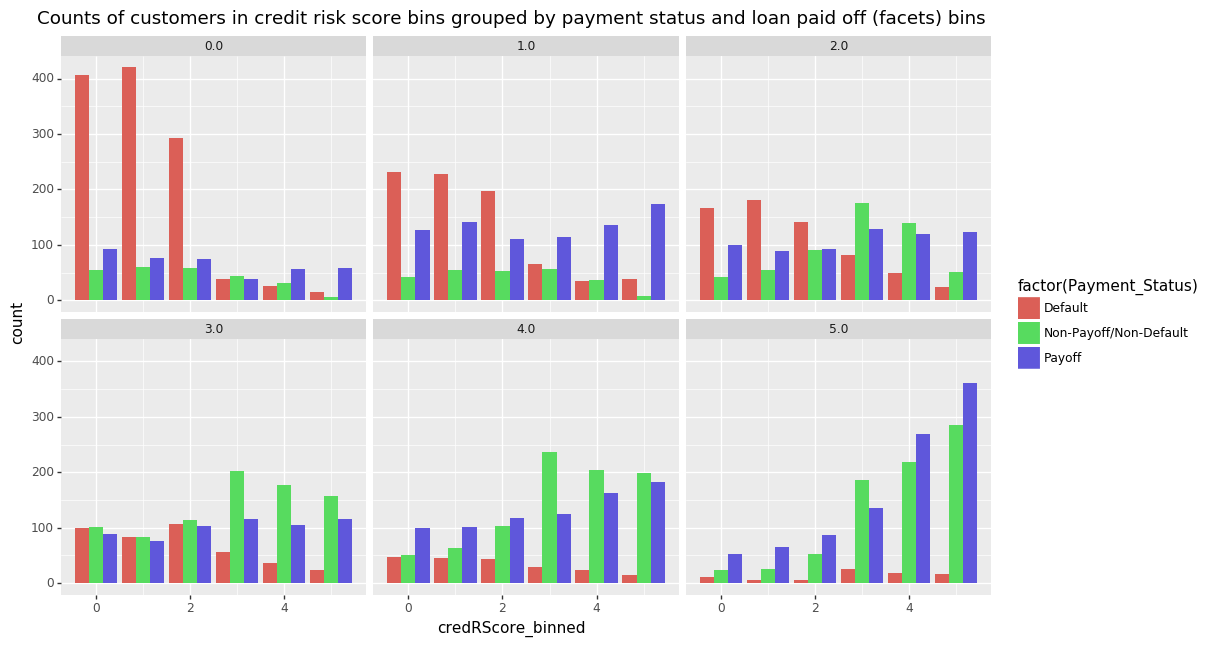

#### 1. Older customers who have paid off their loan (Payment_Status = 'PayOff') mostly have higher credit scores
#### 2. Proportionally more younger customers are likely to default


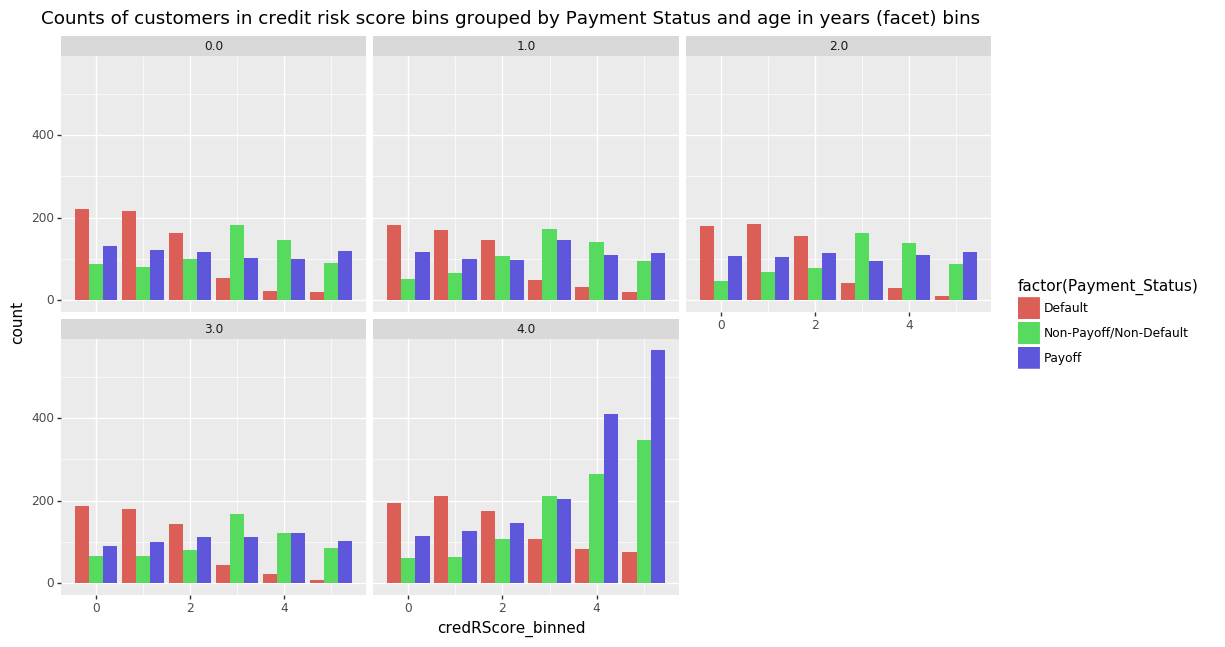

#### 1. At the lowest interest rate defaults are somewhat higher and uniform accross salary brackets
#### 2. In the higher interest rate lower salaries have higher default rates 
#### 3. In the the second bin of starting interest rate, defaults as well as payoffs are increasing with salary
#### 4. In the the third and fourth bins of starting interest rate, defaults decrease and payoffs increase as salary increases.

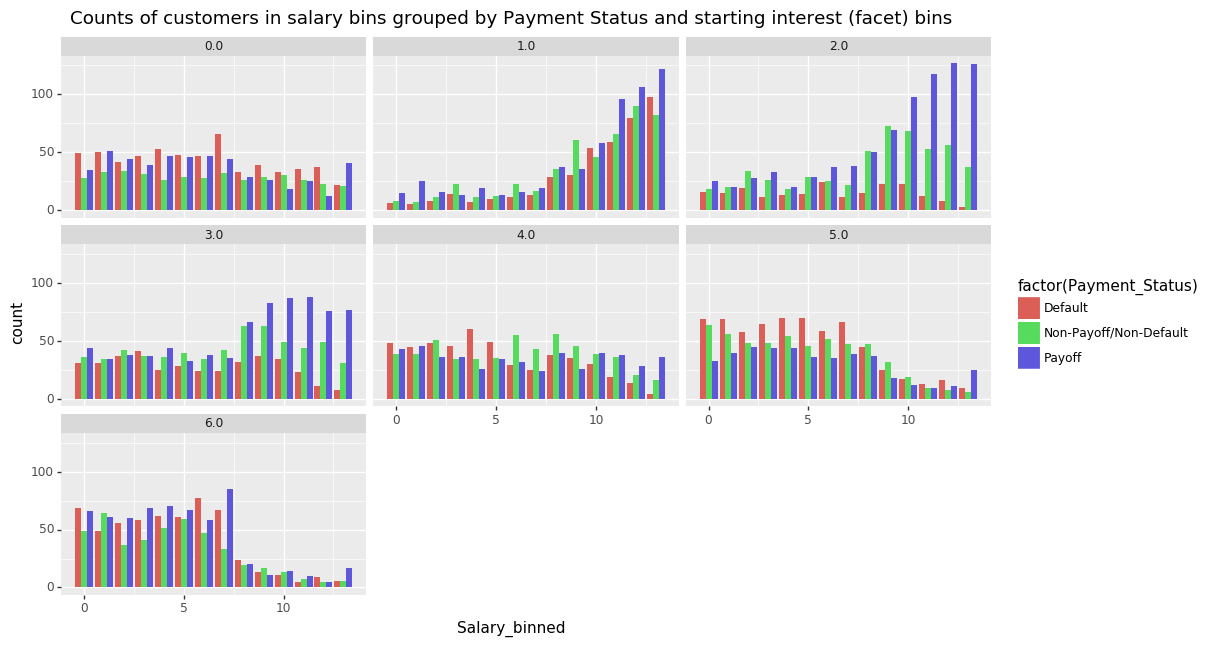

#### 1. As current loan to appraised value ratio increases, defaults increase accross all salary brackets

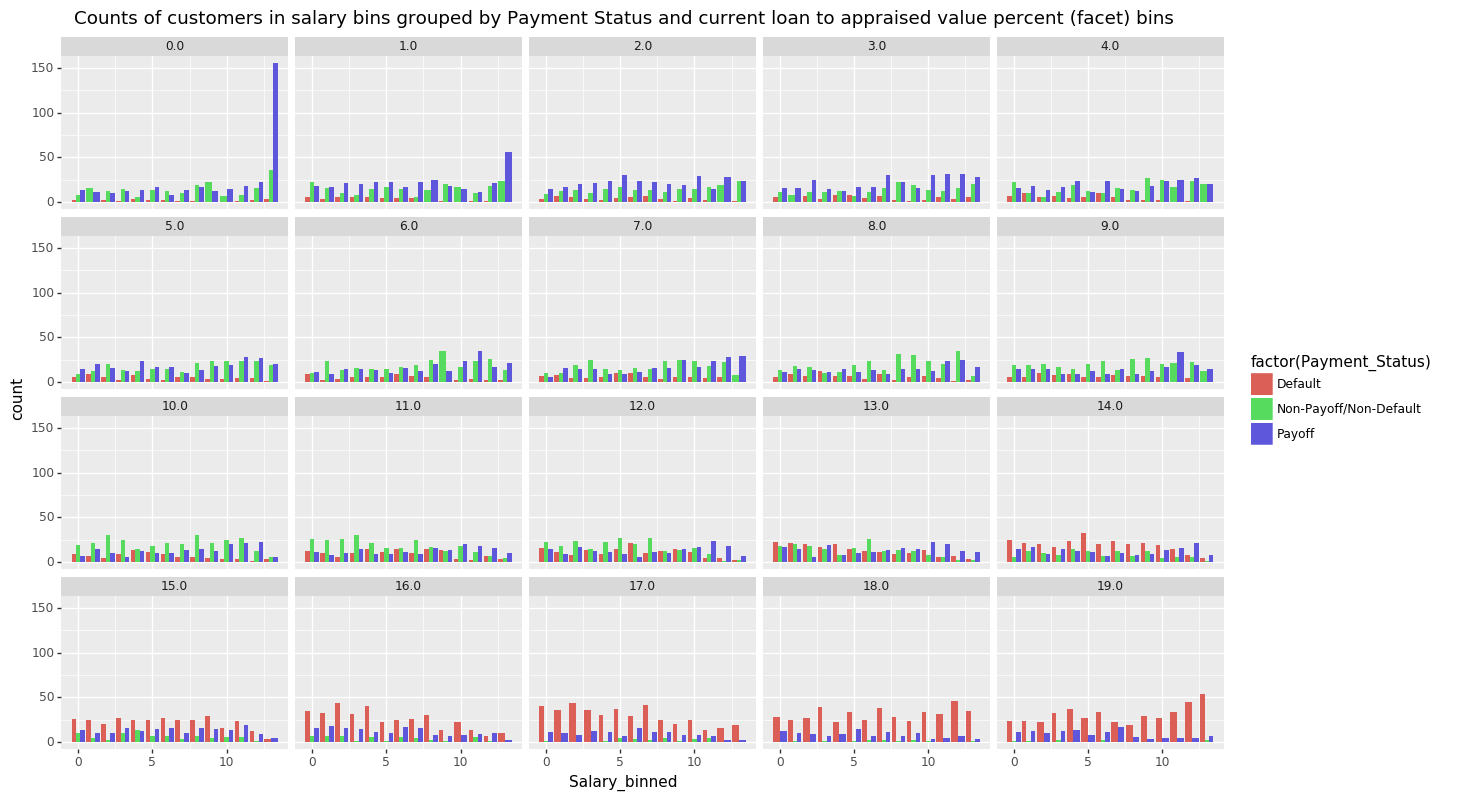

#### 1. Most of the customers earning high salaries are paying highest average loan per transaction, if they are not they are defaulting
#### 2. For lower salaried customers, no matter the average loan paid per transaction, defaults are observed 

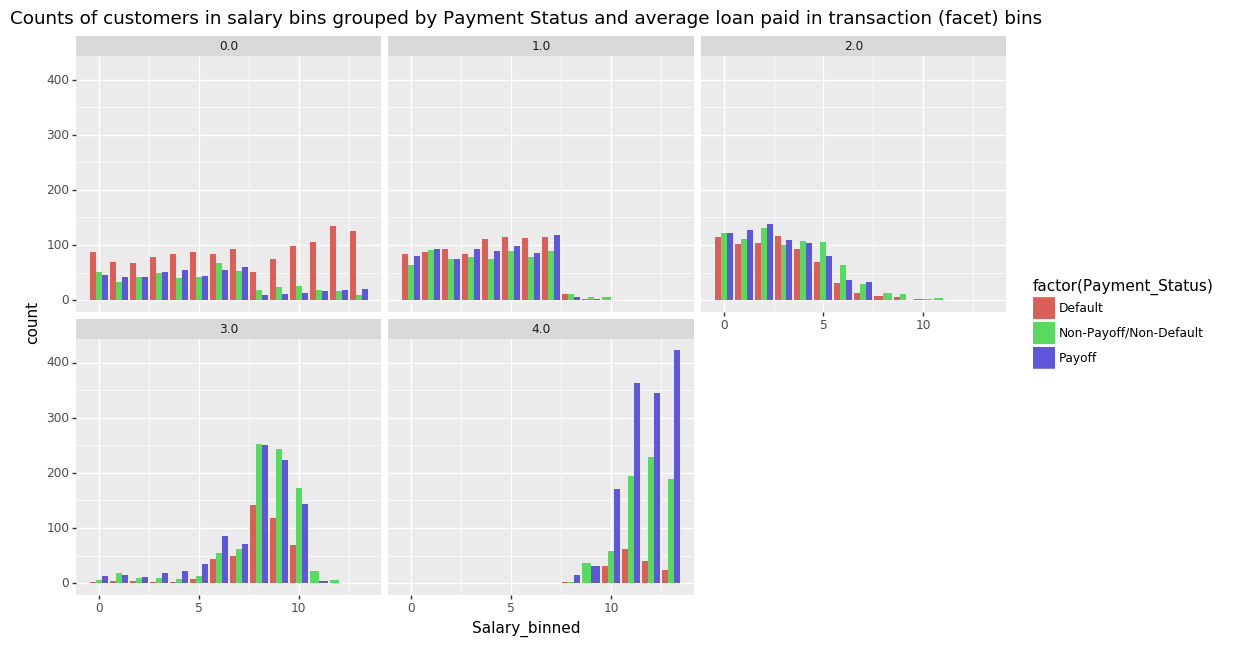

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import os
from datetime import datetime as DateTime

### ============================== START OF CODE ================================

## Data Loading

### The data is given as two separate files, one for train and another for test.

#### Reading both the train datasets

**1. Train-1557019772293 : Dataset of Customer demographics including the target attribute(CreditRiskScore)**

**2. Train_PaymentHistory-1557019802161 : Dataset of payment history**

In [2]:
trainDF_PayHist = pd.read_excel("../Data/Train_PaymentHistory-1557019802161.xlsx")
trainDF_CreditRisk = pd.read_excel("../Data/Train-1557019772293.xlsx")

In [3]:
print(trainDF_PayHist.head())
print("\n==============================================================================================================")
print("\n")
print(trainDF_CreditRisk.head())

  CustomerID  Current_Instalment_Sequence  Starting_Instalment  \
0     C12116                           25                   25   
1     C12116                           26                   25   
2     C12116                           27                   25   
3     C12116                           28                   25   
4     C12116                           29                   25   

   Maturity_Period  Current_Outstanding  \
0              113             41303.42   
1              113             41061.95   
2              113             40804.42   
3              113             40483.89   
4              113             40367.06   

   Current_Loan_to_Appraisedvalu_Percent  CurrentInterestrate  \
0                              24.498336                  9.2   
1                              24.483867                  9.2   
2                              24.626795                  9.2   
3                              24.735883                  9.2   
4                  

#### View Shape of the data

In [4]:
print("Shape of trainDF_PayHist is " + str(trainDF_PayHist.shape))
print("Shape of trainDF_CreditRisk is " + str(trainDF_CreditRisk.shape))

Shape of trainDF_PayHist is (269778, 19)
Shape of trainDF_CreditRisk is (11093, 9)


#### View Information

In [5]:
print("trainDF_PayHist Information: \n")

trainDF_PayHist.info()

trainDF_PayHist Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269778 entries, 0 to 269777
Data columns (total 19 columns):
CustomerID                                269778 non-null object
Current_Instalment_Sequence               269778 non-null int64
Starting_Instalment                       269778 non-null int64
Maturity_Period                           269778 non-null int64
Current_Outstanding                       269778 non-null float64
Current_Loan_to_Appraisedvalu_Percent     269778 non-null float64
CurrentInterestrate                       269778 non-null float64
RealEstate_Current_Inflation              269778 non-null float64
GDP                                       269778 non-null float64
UnemploymentRate                          269778 non-null float64
Asset_type                                269778 non-null object
Urban_Development                         269778 non-null object
Villa_House                               269778 non-null object
Investment

In [6]:
print("trainDF_CreditRisk Information: \n")

trainDF_CreditRisk.info()

trainDF_CreditRisk Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 9 columns):
CustomerID               11093 non-null object
DOB                      11093 non-null object
Salary                   11093 non-null float64
ProfessionalLicensure    11093 non-null int64
UtilitySpending          11093 non-null float64
eCommerceAccount         11093 non-null int64
SocialMediaAccount       11093 non-null object
NoOfProperties           11093 non-null int64
CreditRiskScore          11093 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 780.1+ KB


#### View Summary

In [7]:
print("trainDF_PayHist Summary: \n")

trainDF_PayHist.describe()

trainDF_PayHist Summary: 



,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation
count,269778.000000,269778.000000,269778.000000,2.697780e+05,269778.000000,269778.000000,269778.000000,269778.000000,269778.000000,2.697780e+05,269778.000000,269778.000000,269778.000000
mean,37.644500,23.704264,135.277528,2.444245e+05,82.240253,6.618927,1.792160,1.203403,6.882192,2.586727e+05,78.131288,5.745037,1.958738
std,11.088145,5.337893,21.384173,2.263373e+05,25.576340,2.030486,0.265739,2.040205,1.967250,2.353700e+05,10.389990,2.821784,0.349696
min,1.000000,1.000000,29.000000,0.000000e+00,0.000000,0.250000,1.078300,-4.146711,3.800000,1.046520e+04,50.100000,0.000000,0.757300
25%,30.000000,20.000000,135.000000,9.294234e+04,64.643815,5.625000,1.562100,0.892996,5.000000,1.000000e+05,73.200000,5.250000,1.794500
50%,37.000000,24.000000,141.000000,1.701912e+05,82.348070,6.500000,1.733500,1.692969,6.500000,1.800000e+05,80.000000,6.250000,2.127300
75%,46.000000,28.000000,145.000000,3.465733e+05,101.714058,7.750000,2.006700,2.556052,9.000000,3.680000e+05,80.000000,7.375000,2.223900
max,60.000000,51.000000,200.000000,8.701859e+06,169.357840,37.500000,2.262900,5.132464,10.000000,8.000000e+06,125.000000,18.000000,2.262900


In [8]:
print("trainDF_CreditRisk Summary: \n")

trainDF_CreditRisk.describe()

trainDF_CreditRisk Summary: 



,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,NoOfProperties,CreditRiskScore
count,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,4376.365891,0.572343,342.179622,0.522582,1.429550,627.486703
std,10439.657704,0.494761,90.487895,0.499512,0.815476,148.092576
min,1000.000000,0.000000,185.700917,0.000000,1.000000,350.000000
25%,1392.000000,0.000000,264.933308,0.000000,1.000000,497.000000
50%,1845.000000,1.000000,341.689687,1.000000,1.000000,641.000000
75%,4039.015562,1.000000,420.922078,1.000000,2.000000,778.000000
max,412300.000000,1.000000,495.202445,1.000000,4.000000,830.000000


In [9]:
trainDF_PayHist.dtypes

CustomerID                                 object
Current_Instalment_Sequence                 int64
Starting_Instalment                         int64
Maturity_Period                             int64
Current_Outstanding                       float64
Current_Loan_to_Appraisedvalu_Percent     float64
CurrentInterestrate                       float64
RealEstate_Current_Inflation              float64
GDP                                       float64
UnemploymentRate                          float64
Asset_type                                 object
Urban_Development                          object
Villa_House                                object
Investment_SelfOccupied                    object
Starting_outstanding                      float64
Starting_Loan_to_Appraisedvalu_Percent    float64
StartingInterestrate                      float64
RealEstate_Starting_Inflation             float64
Payment_Status                             object
dtype: object

In [10]:
trainDF_CreditRisk.dtypes

CustomerID                object
DOB                       object
Salary                   float64
ProfessionalLicensure      int64
UtilitySpending          float64
eCommerceAccount           int64
SocialMediaAccount        object
NoOfProperties             int64
CreditRiskScore            int64
dtype: object

### Analysing CustomerIDs in both the datasets

In [11]:
print("Number of unique CustomerIDs in trainDF_PayHist: "+str(len(trainDF_PayHist.CustomerID.unique()))+"\n")
print("Number of unique CustomerIDs in trainDF_CreditRisk: "+str(len(trainDF_CreditRisk.CustomerID.unique())))

Number of unique CustomerIDs in trainDF_PayHist: 11093

Number of unique CustomerIDs in trainDF_CreditRisk: 11093


In [12]:
# mismatch = []
# for id in trainDF_PayHist.CustomerID.unique():
#     if id not in trainDF_CreditRisk.CustomerID.unique():
#         mismatch.append(id)
# if len(mismatch)==0:
#     print("All the CustomerIDs from trainDF_PayHist are present in trainDF_CreditRisk")
    

In [13]:
# mismatch = []
# for id in trainDF_CreditRisk.CustomerID.unique():
#     if id not in trainDF_PayHist.CustomerID.unique():
#         mismatch.append(id)
# if len(mismatch)==0:
#     print("All the CustomerIDs from trainDF_CreditRisk are present in trainDF_PayHist")

# Visualization

In [14]:
# Plotting libraries

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 25, 15
from plotnine import *
from plotnine.data import *
import seaborn as sns
sns.set_style('whitegrid')
sns.set(color_codes=True)

get_ipython().magic('matplotlib inline')

plt.rcParams["figure.figsize"] = (20,10)

%matplotlib inline

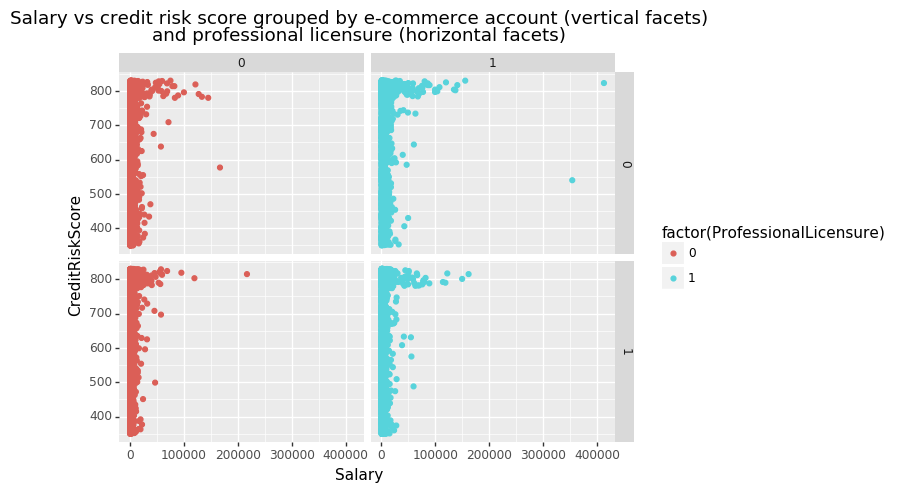

<ggplot: (-9223371943128368731)>

In [15]:
# Plotting creditriskscore with Salary

p = ggplot(trainDF_CreditRisk,aes(x='Salary', y='CreditRiskScore'))
# p+geom_point(aes(color = 'factor(ProfessionalLicensure)'))# + scale_color_gradient(low='grey', high='lightblue')
p+geom_point(aes(color = 'factor(ProfessionalLicensure)'))+facet_grid('eCommerceAccount~ProfessionalLicensure')+\
    labs(title='Salary vs credit risk score grouped by e-commerce account (vertical facets)\nand professional licensure (horizontal facets)')

**Observation:**

Most of the customers in the data set have salary below 25000 and the credit scores ranges widely for this set of customers

Customers earning more that 25000 mostly have good/higher credit scores

Visually, number of customers who have eCommerce account and a professional licensure are more as compared otherwise. (Another visual analysis given below to confirm this observation)



## Feature Engineering 1 (for visualisation)
### Create binned variables for salary
### one using kmeans and another using quantile method

In [16]:
from sklearn.preprocessing import KBinsDiscretizer
num_bins = 14
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
trainDF_CreditRisk['Salary_binned_kmeans'] = enc.fit_transform(np.array(trainDF_CreditRisk.Salary).reshape(-1, 1))

# trainDF_CreditRisk[['Salary','Salary_binned_kmeans']].head()

## Binning Salary with quantile binning method (which gives approximately equal observations in each bin)

from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal')
trainDF_CreditRisk['Salary_binned'] = enc.fit_transform(np.array(trainDF_CreditRisk.Salary).reshape(-1, 1))


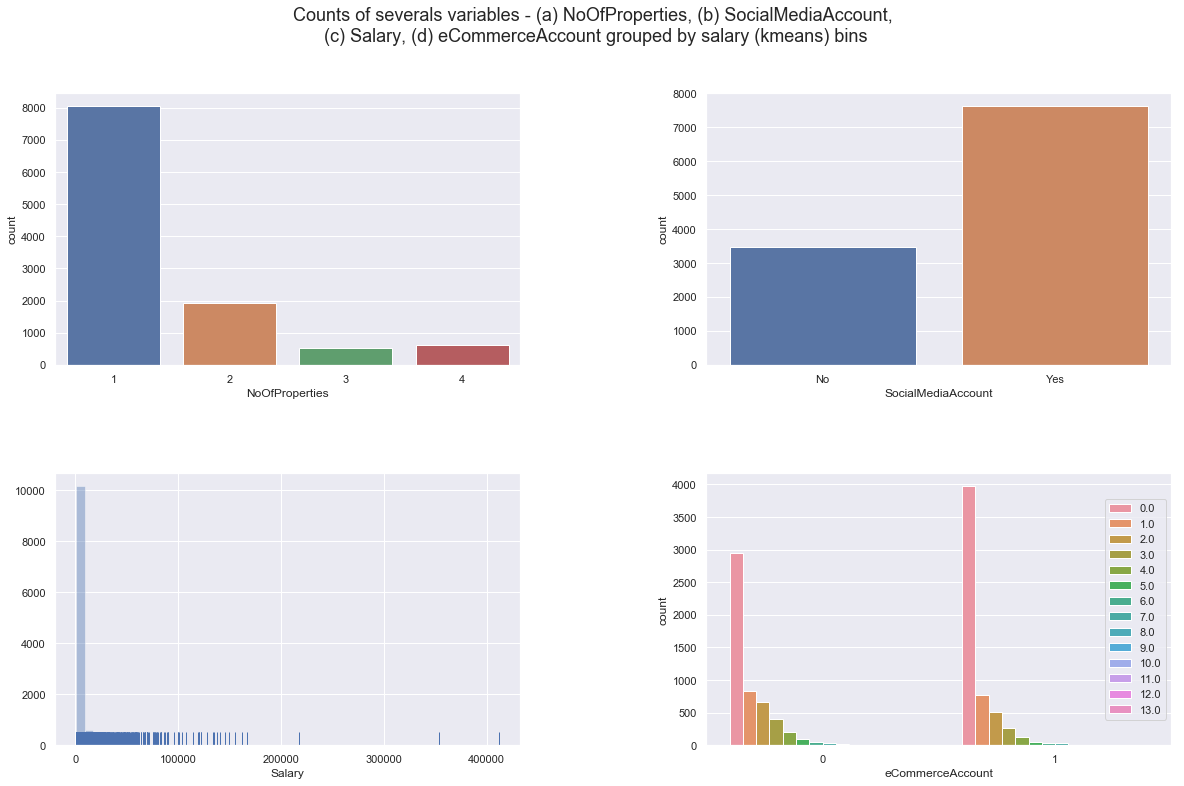

In [17]:
# Plotting CreditRiskScore with Salary coloured by various categorical variables (NoOfProperties, SocialMediaAccount, 
# eCommerceAccount)

plt.rcParams["figure.figsize"] = (20,12)
# plt.rcParams["legend.loc"] = 'right'

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.countplot(x="NoOfProperties", data=trainDF_CreditRisk,ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.countplot(x="SocialMediaAccount", data=trainDF_CreditRisk,ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.distplot(trainDF_CreditRisk.Salary,kde=False,rug=True)
ax = fig.add_subplot(2, 2, 4)
sns.countplot(x="eCommerceAccount",hue='Salary_binned_kmeans', data=trainDF_CreditRisk,ax=ax).legend(loc='right')
fig.suptitle('Counts of severals variables - (a) NoOfProperties, (b) SocialMediaAccount, \n(c) Salary, (d) eCommerceAccount grouped by salary (kmeans) bins', fontsize=18)
plt.show()




**Observations:**

1. Most customers have only single property

2. Number of customers who have a social media account are considerably more than those who don't

3. Majority of the customers in the dataset have lower salary (less than 100000)

4. Most customers in the dataset who have a eCommerceAccount have lower salaries

In [18]:
trainDF_CreditRisk['DOB'] = pd.to_datetime(trainDF_CreditRisk['DOB'], format="%Y-%m-%d")

# create a column with today's date time
trainDF_CreditRisk['today'] = DateTime.today()

# Create timeDiff as difference between today and your Datetime column
trainDF_CreditRisk['timeDiff'] = trainDF_CreditRisk.today - trainDF_CreditRisk['DOB']

# Create age columns (remember to use only one at a time. start with age_in_years

trainDF_CreditRisk['age_in_days'] = trainDF_CreditRisk.timeDiff.dt.days
trainDF_CreditRisk['age_in_years'] = (trainDF_CreditRisk.timeDiff.dt.days/365).apply(lambda x: int(x))
trainDF_CreditRisk['age_in_months'] = (trainDF_CreditRisk.timeDiff.dt.days/365*12).apply(lambda x: int(x))

## Feature Engineering 2 (for visualisation)
### Create binned variables for age
### one using kmeans and another using quantile method

In [19]:
## Binning the age_in_years
num_bins = 5
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
trainDF_CreditRisk['ageYears_binned_kmeans'] = enc.fit_transform(np.array(trainDF_CreditRisk.age_in_years).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
trainDF_CreditRisk['ageYears_binned'] = enc.fit_transform(np.array(trainDF_CreditRisk.age_in_years).reshape(-1, 1))


## Feature Engineering 3 (for visualisation)
### Create binned variables for credit risk score
### one using kmeans and another using quantile method

In [20]:
### Binning credit risk score
num_bins = 6
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
trainDF_CreditRisk['credRScore_binned_kmeans'] = enc.fit_transform(np.array(trainDF_CreditRisk.CreditRiskScore).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
trainDF_CreditRisk['credRScore_binned'] = enc.fit_transform(np.array(trainDF_CreditRisk.CreditRiskScore).reshape(-1, 1))

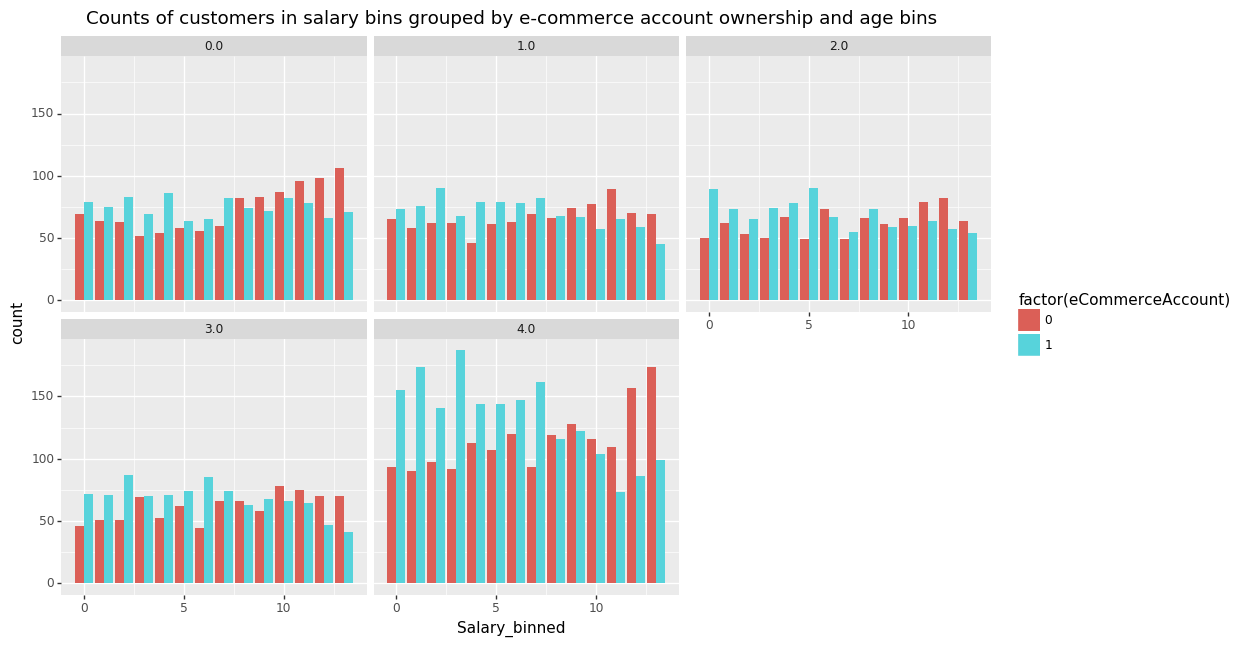

<ggplot: (93724379845)>

In [21]:
salaryBinned_counts_byEcomm = ggplot(trainDF_CreditRisk, aes('Salary_binned', fill = 'factor(eCommerceAccount)')) + \
      geom_bar(position = 'dodge')+facet_wrap('ageYears_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in salary bins grouped by e-commerce account ownership and age bins')
salaryBinned_counts_byEcomm

**Observations**

1. In general, more customers with lower salaries have e-commerce accounts as compared to customer with higher salaries.
2. However, the difference is stark for the higher age group

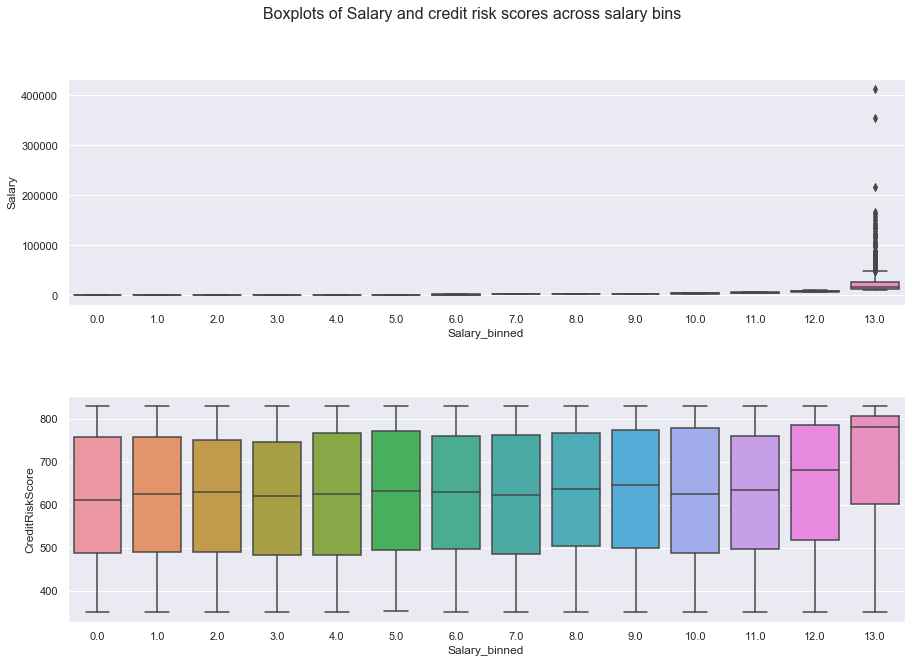

In [22]:
plt.rcParams["figure.figsize"] = (15,10)
# Make boxplot for one group only

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 1, 1)
sns.boxplot( x= trainDF_CreditRisk['Salary_binned'],y=trainDF_CreditRisk["Salary"], ax=ax )
ax = fig.add_subplot(2, 1, 2)
sns.boxplot( x= trainDF_CreditRisk['Salary_binned'],y=trainDF_CreditRisk["CreditRiskScore"], ax=ax)
fig.suptitle('Boxplots of Salary and credit risk scores across salary bins', fontsize=16)
plt.show()

**Observation:**

1. Higher salary customers (Last bin) have extremely skewed distribution.
2. For the higher salary group the credit scores are high with some outliers at the lower end.
3. All the other salary groups have no outliers neither in the salary nor in the credit risk scores.
4. More or less homogeneous characteristics for all salary bins except the last one shown by the fact that the medians of each of these groups lie within the confidence interval.

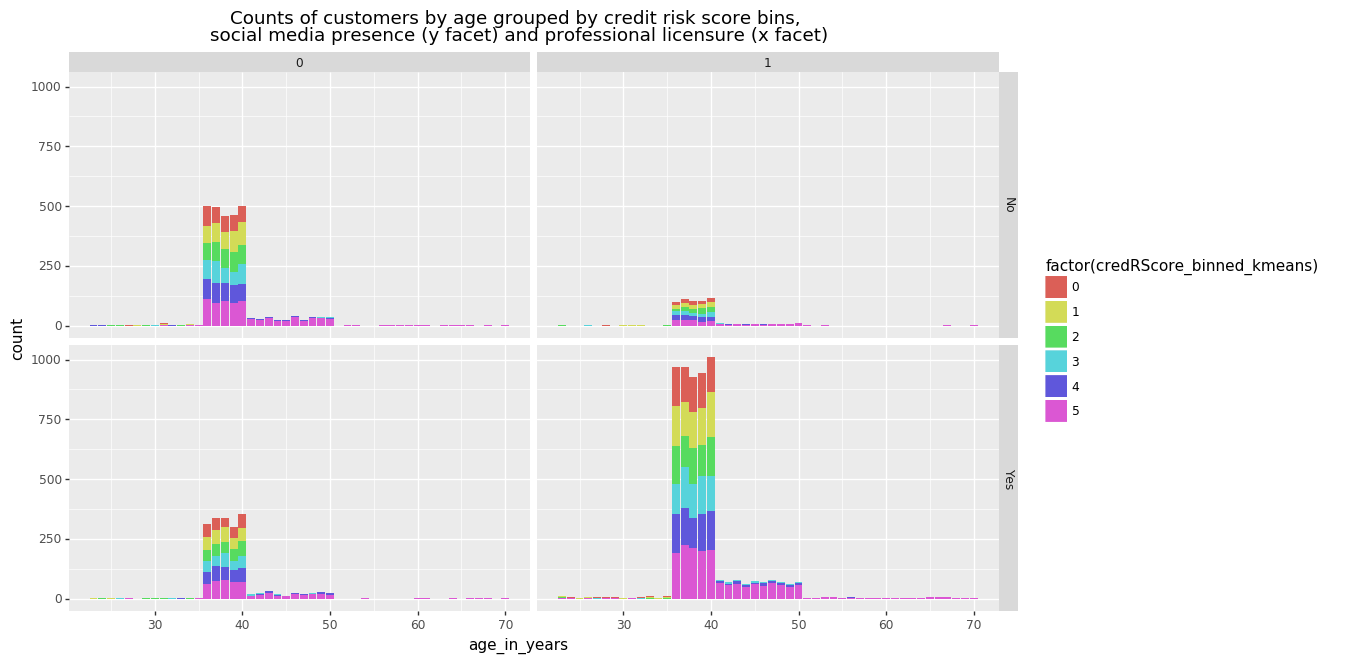

<ggplot: (-9223371943130076563)>

In [23]:
myplot = ggplot(trainDF_CreditRisk, aes('age_in_years', fill = 'factor(credRScore_binned_kmeans)')) + \
      geom_bar()+facet_grid('SocialMediaAccount~ProfessionalLicensure') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers by age grouped by credit risk score bins, \nsocial media presence (y facet) and professional licensure (x facet)')
myplot

**Observations**
1. Largest number of customers are between 35 to 40 years of age across all groupings
2. Relative proportions of credit risk score are more or less similar across all groupings
2. Highest number of customers have professional licensure and social media accounts followed by those who have neither
3. Lowest number of customers have professional licensure but no social media account
4. Number of customers having higher credit risk scores is higher for those having professional licensure and social media account

## Feature Engineering 4
### Adding new features

#### First on the payment history data set

In [24]:
## Calculate additional features
trainDF_PayHist['Loan_tenure_with_current'] = trainDF_PayHist['Current_Instalment_Sequence'] - \
                                                    trainDF_PayHist['Starting_Instalment'] + 1

trainDF_PayHist['Remaining_loan_tenure'] = trainDF_PayHist['Maturity_Period'] - \
                                                    trainDF_PayHist['Current_Instalment_Sequence']

trainDF_PayHist['loan_paid_off'] = trainDF_PayHist['Starting_outstanding'] - \
                                        trainDF_PayHist['Current_Outstanding']

## Group by the Customer ID
trainDF_PayHist_groupByCustID = trainDF_PayHist.groupby('CustomerID')

## Sort the payment history dataframe by customerID and loan_tenure_with_current, then groupby customerID, then 
## diff() the loan_paid_off column. This will give a new column

trainDF_PayHist['loan_paid_in_transaction'] = trainDF_PayHist.sort_values(['CustomerID','Loan_tenure_with_current'])\
                                        .groupby('CustomerID')['loan_paid_off'].diff()

trainDF_PayHist.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status,Loan_tenure_with_current,Remaining_loan_tenure,loan_paid_off,loan_paid_in_transaction
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,...,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default,1,88,3696.58,NaN
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,...,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default,2,87,3938.05,241.47
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,...,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default,3,86,4195.58,257.53
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,...,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default,4,85,4516.11,320.53
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,...,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default,5,84,4632.94,116.83


In [25]:
# print(trainDF_PayHist.shape)


# First entry of 'loan_paid_in_transaction' for every customer should 'NaN'. Hence, there should not be more than 11093 NaNs
# in this column

print('Unique CustomerIDs in trainDF_PayHist: {}'.format(len(trainDF_PayHist.CustomerID.unique())))
print('Number of Null values in loan_paid_in_transaction column: {}'.format(len(trainDF_PayHist[trainDF_PayHist['loan_paid_in_transaction'].isnull()])))


# Checking the negative values in 'loan_paid_in_transaction' column

trainDF_PayHist[(trainDF_PayHist['loan_paid_in_transaction']<0)][['CustomerID','loan_paid_in_transaction']]


# Total number of negative values in 'loan_paid_in_transaction' column
# len(trainDF_PayHist[trainDF_PayHist['loan_paid_in_transaction']<0].CustomerID.unique())
print("\nTotal number of negative values in 'loan_paid_in_transaction' column: {}"\
      .format(len(trainDF_PayHist[(trainDF_PayHist['loan_paid_in_transaction']<0)][['CustomerID','loan_paid_in_transaction']])))

Unique CustomerIDs in trainDF_PayHist: 11093
Number of Null values in loan_paid_in_transaction column: 11093

Total number of negative values in 'loan_paid_in_transaction' column: 11517


In [26]:
trainDF_PayHist[(trainDF_PayHist['loan_paid_in_transaction']<0)].head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status,Loan_tenure_with_current,Remaining_loan_tenure,loan_paid_off,loan_paid_in_transaction
130,C12120,52,25,107,48243.93,24.415115,4.000,1.6113,1.081049,8.0,...,Self Occupancy,61600.0,64.3,9.25,0.7812,Non-Payoff/Non-Default,28,55,13356.07,-119.78
302,C12128,34,33,141,139444.87,103.497317,8.000,1.7335,-0.314448,5.8,...,Investment,140000.0,79.6,8.00,2.2629,Non-Payoff/Non-Default,2,107,555.13,-2259.42
447,C12135,37,25,142,268124.50,112.363338,7.000,1.5335,-4.146711,9.0,...,Self Occupancy,260000.0,80.0,7.80,2.0886,Non-Payoff/Non-Default,13,105,-8124.50,-8125.00
468,C12136,42,25,142,184468.09,108.774718,2.125,1.6100,3.029499,9.4,...,Self Occupancy,176000.0,80.0,5.76,2.0886,Non-Payoff/Non-Default,18,100,-8468.09,-8592.34
702,C12145,42,26,143,223871.48,118.679695,3.890,1.6100,3.029499,9.4,...,Self Occupancy,208000.0,80.0,8.89,2.2191,Non-Payoff/Non-Default,17,101,-15871.48,-21015.53


In [27]:
print("\nTotal number of negative values in 'loan_paid_off' column: {}"\
      .format(len(trainDF_PayHist[(trainDF_PayHist['loan_paid_off']<0)][['CustomerID','loan_paid_off']])))


Total number of negative values in 'loan_paid_off' column: 21707


In [28]:
trainDF_PayHist[(trainDF_PayHist['loan_paid_off']<0)]\
[['CustomerID','loan_paid_off', 'loan_paid_in_transaction', 'Current_Outstanding', 'Starting_outstanding']].head(10)

,CustomerID,loan_paid_off,loan_paid_in_transaction,Current_Outstanding,Starting_outstanding
447,C12135,-8124.50,-8125.00,268124.50,260000.0
448,C12135,-8124.50,0.00,268124.50,260000.0
449,C12135,-8124.50,0.00,268124.50,260000.0
450,C12135,-8124.50,0.00,268124.50,260000.0
468,C12136,-8468.09,-8592.34,184468.09,176000.0
469,C12136,-7078.10,1389.99,183078.10,176000.0
470,C12136,-5680.72,1397.38,181680.72,176000.0
471,C12136,-3272.37,2408.35,179272.37,176000.0
472,C12136,-1854.74,1417.63,177854.74,176000.0
473,C12136,-389.90,1464.84,176389.90,176000.0


### Possible reason for negative loan paid off or negative loan paid in transaction values
#### Negative amortization:
It is an increase in the principal balance of a loan caused by a failure to make payments that cover the interest due. The remaining amount of interest owed is added to the loan's principal.

**As the data for principal amount and mortgage repayment in the transactions is unavailable, there is insuffifient data to prove that the current outstanding data provided is incorrect**

## Feature Engineering 5
### Aggregating features from trainDF_PayHist to merge them with trainDF_CreditRisk in a seperate dataframe named finalDF

#### For every customer, selecting total number of trasactions with the currect company

#### For every customer, selecting average loan id in a transaction

In [29]:
# Calculate the count of transactions (instalments 'Loan_tenure_with_current') per customer


trainDF_PayHist_transactionPerCust = trainDF_PayHist.groupby('CustomerID').agg({'Loan_tenure_with_current':'count'})
## need to reset the index because the agg() operation sets the index of the resulting data frame as the column on
## which the grouping has been done
trainDF_PayHist_transactionPerCust.reset_index(inplace=True)
trainDF_PayHist_transactionPerCust.rename(index=str, columns={"Loan_tenure_with_current": "Total_no_of_loan_tenure_with_current"}, inplace=True)

trainDF_PayHist_transactionPerCust.head()

,CustomerID,Total_no_of_loan_tenure_with_current
0,C12116,24
1,C12117,10
2,C12118,35
3,C12119,35
4,C12120,35


In [30]:
# Calculate the average loan paid in transaction


trainDF_PayHist_AvgTransactPerCust = trainDF_PayHist.groupby('CustomerID').agg({'loan_paid_in_transaction':'mean'})
## need to reset the index because the agg() operation sets the index of the resulting data frame as the column on
## which the grouping has been done
trainDF_PayHist_AvgTransactPerCust.reset_index(inplace=True)

trainDF_PayHist_AvgTransactPerCust.rename(index=str, columns={"loan_paid_in_transaction": "Avg_loan_paid_in_transaction"}, inplace=True)

trainDF_PayHist_AvgTransactPerCust.head()

,CustomerID,Avg_loan_paid_in_transaction
0,C12116,531.139565
1,C12117,267.554444
2,C12118,211.118235
3,C12119,161.588529
4,C12120,389.036471


In [31]:
# Now, join the above two data frames with the Credit Risk table with the Customer ID as the join-on column

finalDF = deepcopy(trainDF_CreditRisk)

finalDF = finalDF.merge(trainDF_PayHist_transactionPerCust,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)
finalDF = finalDF.merge(trainDF_PayHist_AvgTransactPerCust,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)
finalDF.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Salary_binned_kmeans,...,timeDiff,age_in_days,age_in_years,age_in_months,ageYears_binned_kmeans,ageYears_binned,credRScore_binned_kmeans,credRScore_binned,Total_no_of_loan_tenure_with_current,Avg_loan_paid_in_transaction
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711,0.0,...,18280 days 19:54:56.889371,18280,50,600,2.0,4.0,4.0,3.0,24,531.139565
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767,0.0,...,13895 days 19:54:56.889371,13895,38,456,1.0,2.0,5.0,4.0,10,267.554444
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827,0.0,...,17986 days 19:54:56.889371,17986,49,591,2.0,4.0,5.0,5.0,35,211.118235
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795,0.0,...,15723 days 19:54:56.889371,15723,43,516,2.0,4.0,5.0,4.0,35,161.588529
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827,0.0,...,16087 days 19:54:56.889371,16087,44,528,2.0,4.0,5.0,5.0,35,389.036471


## Feature Engineering 5
### Aggregating features from trainDF_PayHist to merge them with trainDF_CreditRisk in a seperate dataframe named finalDF

#### Selecting only one value for each customer for all categorical variables except "Payment_Status"
#### For Payment_Status, select the latest value for each customer (i.e. the value for the last instalment)
#### Thus, take the last value for all categorical variables


In [32]:
trainDF_PayHist_CategCols = trainDF_PayHist.select_dtypes('object')
trainDF_PayHist_CategCols.head()

,CustomerID,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Payment_Status
0,C12116,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
1,C12116,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
2,C12116,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
3,C12116,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
4,C12116,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default


In [33]:
trainDF_PayHist_CategCols_lastVals = trainDF_PayHist_CategCols.groupby('CustomerID').agg('last').reset_index()

trainDF_PayHist_CategCols_lastVals.head()

,CustomerID,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Payment_Status
0,C12116,No shred services,No,Yes,Self Occupancy,Default
1,C12117,No shred services,No,Yes,Self Occupancy,Default
2,C12118,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
3,C12119,Complex With shared services,No,No,Self Occupancy,Non-Payoff/Non-Default
4,C12120,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default


In [34]:
# Now, join the data frame with last values of categorical columns to the finalDF table containing the
# credit risk data with the Customer ID as the join-on column

finalDF = finalDF.merge(trainDF_PayHist_CategCols_lastVals,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)
finalDF.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Salary_binned_kmeans,...,ageYears_binned,credRScore_binned_kmeans,credRScore_binned,Total_no_of_loan_tenure_with_current,Avg_loan_paid_in_transaction,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Payment_Status
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711,0.0,...,4.0,4.0,3.0,24,531.139565,No shred services,No,Yes,Self Occupancy,Default
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767,0.0,...,2.0,5.0,4.0,10,267.554444,No shred services,No,Yes,Self Occupancy,Default
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827,0.0,...,4.0,5.0,5.0,35,211.118235,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795,0.0,...,4.0,5.0,4.0,35,161.588529,Complex With shared services,No,No,Self Occupancy,Non-Payoff/Non-Default
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827,0.0,...,4.0,5.0,5.0,35,389.036471,No shred services,No,Yes,Self Occupancy,Non-Payoff/Non-Default


## Feature Engineering 5
### Aggregating features from trainDF_PayHist to merge them with trainDF_CreditRisk in a seperate dataframe named finalDF

#### Selecting numerical columns from trainDF_PayHist which can be directly flattened using the latest value for each customer (i.e. the value for the last instalment)

In [35]:
trainDF_PayHist_NumericalCols_direct_flaten = trainDF_PayHist[['CustomerID','Starting_Instalment', 'Maturity_Period', 
                                                               'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent', 'StartingInterestrate',
                                                               'RealEstate_Starting_Inflation']]
trainDF_PayHist_NumericalCols_direct_flaten.head()

,CustomerID,Starting_Instalment,Maturity_Period,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation
0,C12116,25,113,45000.0,69.4,9.2,0.8703
1,C12116,25,113,45000.0,69.4,9.2,0.8703
2,C12116,25,113,45000.0,69.4,9.2,0.8703
3,C12116,25,113,45000.0,69.4,9.2,0.8703
4,C12116,25,113,45000.0,69.4,9.2,0.8703


In [36]:
trainDF_PayHist_NumericalCols_direct_flaten_lastVals = trainDF_PayHist_NumericalCols_direct_flaten.\
                                                        groupby('CustomerID').\
                                                        agg('last').reset_index()

trainDF_PayHist_NumericalCols_direct_flaten_lastVals.head()

,CustomerID,Starting_Instalment,Maturity_Period,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation
0,C12116,25,113,45000.0,69.4,9.20,0.8703
1,C12117,25,138,164500.0,70.0,7.50,1.8691
2,C12118,25,105,44000.0,52.5,13.00,0.7778
3,C12119,25,106,34800.0,56.9,12.35,0.7837
4,C12120,25,107,61600.0,64.3,9.25,0.7812


In [37]:
# Now, join the data frame with last values of categorical columns to the finalDF table containing the
# credit risk data with the Customer ID as the join-on column

finalDF = finalDF.merge(trainDF_PayHist_NumericalCols_direct_flaten_lastVals,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)
finalDF.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Salary_binned_kmeans,...,Urban_Development,Villa_House,Investment_SelfOccupied,Payment_Status,Starting_Instalment,Maturity_Period,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711,0.0,...,No,Yes,Self Occupancy,Default,25,113,45000.0,69.4,9.20,0.8703
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767,0.0,...,No,Yes,Self Occupancy,Default,25,138,164500.0,70.0,7.50,1.8691
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827,0.0,...,No,Yes,Self Occupancy,Non-Payoff/Non-Default,25,105,44000.0,52.5,13.00,0.7778
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795,0.0,...,No,No,Self Occupancy,Non-Payoff/Non-Default,25,106,34800.0,56.9,12.35,0.7837
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827,0.0,...,No,Yes,Self Occupancy,Non-Payoff/Non-Default,25,107,61600.0,64.3,9.25,0.7812


## Feature Engineering 5
### Aggregating features from trainDF_PayHist to merge them with trainDF_CreditRisk in a seperate dataframe named finalDF

#### Selecting the remaing numerical columns in trainDF_PayHist for merging with finalDF
#### Selecting the latest value for each customer for the following columns:
        Current_Instalment_Sequence,
        Current_Outstanding,
        Current_Loan_to_Appraisedvalu_Percent,
        RealEstate_Current_Inflation,
        Remaining_loan_tenure,
        loan_paid_off
        

#### Selecting the average values for each customer for the following columns:
        CurrentInterestrate,
        GDP,
        UnemploymentRate

In [38]:
thelist = []
for col in trainDF_PayHist.columns:
    if col not in finalDF.columns:
        thelist.append(col)
# print(thelist,'\n')        

# print(len(finalDF.columns),'\n')

# print(len(thelist), '\n')

#removing the columns already covered in final DF 
thelist.remove('Loan_tenure_with_current')
thelist.remove('loan_paid_in_transaction')
# print(len(thelist), '\n')
# Appending CustomerID to the column name list
thelist.append('CustomerID')

# Creating two different liust for last value selection columns and average values selection columns

thelist_last_values = thelist  

In [39]:
thelist_last_values.remove('CurrentInterestrate')
thelist_last_values.remove('GDP')
thelist_last_values.remove('UnemploymentRate')
# thelist_last_values

In [40]:
thelist_avg_values = ['CustomerID', 'CurrentInterestrate', 'GDP', 'UnemploymentRate']
# thelist_avg_values

In [41]:

trainDF_PayHist_NumericalCols = trainDF_PayHist[thelist_last_values]
# trainDF_PayHist_NumericalCols.head()

trainDF_PayHist_NumericalCols_flaten_last_value = trainDF_PayHist_NumericalCols.\
                                                        groupby('CustomerID').\
                                                        agg('last').reset_index()

trainDF_PayHist_NumericalCols_flaten_last_value.head()

,CustomerID,Current_Instalment_Sequence,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,RealEstate_Current_Inflation,Remaining_loan_tenure,loan_paid_off
0,C12116,48,29087.21,26.658065,1.4645,65,15912.79
1,C12117,34,160044.34,73.431289,1.7335,104,4455.66
2,C12118,60,34562.30,16.897997,1.8982,45,9437.70
3,C12119,60,27355.73,18.466696,1.8982,46,7444.27
4,C12120,60,43102.83,18.516390,1.8982,47,18497.17


In [42]:
trainDF_PayHist_NumericalCols_avg = trainDF_PayHist[thelist_avg_values]

trainDF_PayHist_NumericalCols_flaten_avg = trainDF_PayHist_NumericalCols_avg.\
                                                        groupby('CustomerID').\
                                                        agg('mean').reset_index()

trainDF_PayHist_NumericalCols_flaten_avg.head()

,CustomerID,CurrentInterestrate,GDP,UnemploymentRate
0,C12116,9.200000,0.879284,7.241667
1,C12117,9.688000,1.608584,4.810000
2,C12118,13.010714,1.264322,7.162857
3,C12119,12.350000,1.264322,7.162857
4,C12120,8.525000,1.264322,7.162857


In [43]:
finalDF = finalDF.merge(trainDF_PayHist_NumericalCols_flaten_last_value,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)
finalDF = finalDF.merge(trainDF_PayHist_NumericalCols_flaten_avg,how='left',left_on = 'CustomerID',\
                      right_on='CustomerID',left_index=False, right_index=False)

# finalDF.rename(index=str, columns={"Loan_tenure_with_current": "Total_no_of_loan_tenure_with_current"}, inplace=True)


finalDF.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Salary_binned_kmeans,...,RealEstate_Starting_Inflation,Current_Instalment_Sequence,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,RealEstate_Current_Inflation,Remaining_loan_tenure,loan_paid_off,CurrentInterestrate,GDP,UnemploymentRate
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711,0.0,...,0.8703,48,29087.21,26.658065,1.4645,65,15912.79,9.200000,0.879284,7.241667
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767,0.0,...,1.8691,34,160044.34,73.431289,1.7335,104,4455.66,9.688000,1.608584,4.810000
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827,0.0,...,0.7778,60,34562.30,16.897997,1.8982,45,9437.70,13.010714,1.264322,7.162857
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795,0.0,...,0.7837,60,27355.73,18.466696,1.8982,46,7444.27,12.350000,1.264322,7.162857
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827,0.0,...,0.7812,60,43102.83,18.516390,1.8982,47,18497.17,8.525000,1.264322,7.162857


## Feature Engineering 6
### Dropping features which are not required for further visualization

#### Columns dropped:
        DOB
        today
        timeDiff
        age_in_days
        age_in_months

In [44]:
# finalDF.columns

finalDF.drop(['DOB', 'today','timeDiff','age_in_days', 'age_in_months'], axis=1,inplace=True)

finalDF.shape

(11093, 37)

In [45]:
# Creating two lists. One for categorical columns and another for numerical columns in finalDF

finalDF_cat_col = [ 'ProfessionalLicensure', 'eCommerceAccount', 'SocialMediaAccount', 'NoOfProperties', 
                   'Salary_binned_kmeans', 'Salary_binned', 'ageYears_binned_kmeans', 'ageYears_binned', 
                   'credRScore_binned_kmeans', 'credRScore_binned', 'Asset_type', 'Urban_Development', 
                   'Villa_House', 'Investment_SelfOccupied', 'Payment_Status']

finalDF_num_col = []
for col in finalDF.columns:
    if col not in finalDF_cat_col:
        finalDF_num_col.append(col)
finalDF_num_col.remove('CustomerID')        
print(finalDF_num_col)

['Salary', 'UtilitySpending', 'CreditRiskScore', 'age_in_years', 'Total_no_of_loan_tenure_with_current', 'Avg_loan_paid_in_transaction', 'Starting_Instalment', 'Maturity_Period', 'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent', 'StartingInterestrate', 'RealEstate_Starting_Inflation', 'Current_Instalment_Sequence', 'Current_Outstanding', 'Current_Loan_to_Appraisedvalu_Percent', 'RealEstate_Current_Inflation', 'Remaining_loan_tenure', 'loan_paid_off', 'CurrentInterestrate', 'GDP', 'UnemploymentRate']


## Feature Engineering 7 (for further visualisation)
### Create binned variables for 
        UtilitySpending, Total_no_of_loan_tenure_with_current, Avg_loan_paid_in_transaction, Starting_Instalment,
        Maturity_Period, Starting_outstanding, Starting_Loan_to_Appraisedvalu_Percent, StartingInterestrate, 
        RealEstate_Starting_Inflation, Current_Instalment_Sequence, Current_Outstanding, 
        Current_Loan_to_Appraisedvalu_Percent, RealEstate_Current_Inflation, Remaining_loan_tenure, loan_paid_off,
        CurrentInterestrate, GDP, UnemploymentRate

### one using kmeans and another using quantile method

In [46]:
## Binning the UtilitySpending
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['UtilitySpending_binned_kmeans'] = enc.fit_transform(np.array(finalDF.UtilitySpending).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['UtilitySpending_binned'] = enc.fit_transform(np.array(finalDF.UtilitySpending).reshape(-1, 1))


## Binning the Total_no_of_loan_tenure_with_current
num_bins = 15
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Total_no_of_loan_tenure_with_current_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Total_no_of_loan_tenure_with_current).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Total_no_of_loan_tenure_with_current_binned'] = enc.fit_transform(np.array(finalDF.Total_no_of_loan_tenure_with_current).reshape(-1, 1))

## Binning the Avg_loan_paid_in_transaction
num_bins = 5
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Avg_loan_paid_in_transaction_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Avg_loan_paid_in_transaction).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Avg_loan_paid_in_transaction_binned'] = enc.fit_transform(np.array(finalDF.Avg_loan_paid_in_transaction).reshape(-1, 1))

## Binning the Starting_Instalment
num_bins = 13
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Starting_Instalment_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Starting_Instalment).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Starting_Instalment_binned'] = enc.fit_transform(np.array(finalDF.Starting_Instalment).reshape(-1, 1))

## Binning the Maturity_Period
num_bins = 14
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Maturity_Period_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Maturity_Period).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Maturity_Period_binned'] = enc.fit_transform(np.array(finalDF.Maturity_Period).reshape(-1, 1))

## Binning the Starting_outstanding
num_bins = 15
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Starting_outstanding_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Starting_outstanding).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Starting_outstanding_binned'] = enc.fit_transform(np.array(finalDF.Starting_outstanding).reshape(-1, 1))

## Binning the Starting_Loan_to_Appraisedvalu_Percent
num_bins = 3
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Starting_Loan_to_Appraisedvalu_Percent_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Starting_Loan_to_Appraisedvalu_Percent).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Starting_Loan_to_Appraisedvalu_Percent_binned'] = enc.fit_transform(np.array(finalDF.Starting_Loan_to_Appraisedvalu_Percent).reshape(-1, 1))

## Binning the StartingInterestrate
num_bins = 7
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['StartingInterestrate_binned_kmeans'] = enc.fit_transform(np.array(finalDF.StartingInterestrate).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['StartingInterestrate_binned'] = enc.fit_transform(np.array(finalDF.StartingInterestrate).reshape(-1, 1))

## Binning the RealEstate_Starting_Inflation
num_bins = 11
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['RealEstate_Starting_Inflation_binned_kmeans'] = enc.fit_transform(np.array(finalDF.RealEstate_Starting_Inflation).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['RealEstate_Starting_Inflation_binned'] = enc.fit_transform(np.array(finalDF.RealEstate_Starting_Inflation).reshape(-1, 1))

## Binning the Current_Instalment_Sequence
num_bins = 3
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Current_Instalment_Sequence_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Current_Instalment_Sequence).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Current_Instalment_Sequence_binned'] = enc.fit_transform(np.array(finalDF.Current_Instalment_Sequence).reshape(-1, 1))

## Binning the Current_Outstanding
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Current_Outstanding_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Current_Outstanding).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Current_Outstanding_binned'] = enc.fit_transform(np.array(finalDF.Current_Outstanding).reshape(-1, 1))

## Binning the Current_Loan_to_Appraisedvalu_Percent
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Current_Loan_to_Appraisedvalu_Percent_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Current_Loan_to_Appraisedvalu_Percent).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Current_Loan_to_Appraisedvalu_Percent_binned'] = enc.fit_transform(np.array(finalDF.Current_Loan_to_Appraisedvalu_Percent).reshape(-1, 1))

## Binning the RealEstate_Current_Inflation
num_bins = 4
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['RealEstate_Current_Inflation_binned_kmeans'] = enc.fit_transform(np.array(finalDF.RealEstate_Current_Inflation).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['RealEstate_Current_Inflation_binned'] = enc.fit_transform(np.array(finalDF.RealEstate_Current_Inflation).reshape(-1, 1))

## Binning the Remaining_loan_tenure
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['Remaining_loan_tenure_binned_kmeans'] = enc.fit_transform(np.array(finalDF.Remaining_loan_tenure).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['Remaining_loan_tenure_binned'] = enc.fit_transform(np.array(finalDF.Remaining_loan_tenure).reshape(-1, 1))

## Binning the loan_paid_off
num_bins = 6
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['loan_paid_off_binned_kmeans'] = enc.fit_transform(np.array(finalDF.loan_paid_off).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['loan_paid_off_binned'] = enc.fit_transform(np.array(finalDF.loan_paid_off).reshape(-1, 1))

## Binning the CurrentInterestrate
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['CurrentInterestrate_binned_kmeans'] = enc.fit_transform(np.array(finalDF.CurrentInterestrate).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['CurrentInterestrate_binned'] = enc.fit_transform(np.array(finalDF.CurrentInterestrate).reshape(-1, 1))

## Binning the GDP
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['GDP_binned_kmeans'] = enc.fit_transform(np.array(finalDF.GDP).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['GDP_binned'] = enc.fit_transform(np.array(finalDF.GDP).reshape(-1, 1))

## Binning the UnemploymentRate
num_bins = 20
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
finalDF['UnemploymentRate_binned_kmeans'] = enc.fit_transform(np.array(finalDF.UnemploymentRate).reshape(-1, 1))
enc = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
finalDF['UnemploymentRate_binned'] = enc.fit_transform(np.array(finalDF.UnemploymentRate).reshape(-1, 1))

## Visualization

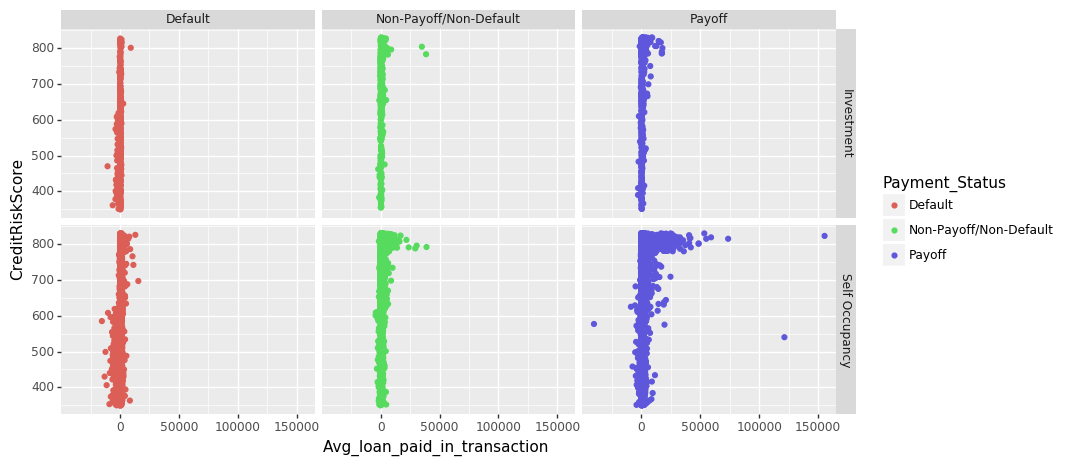

<ggplot: (-9223371943130437870)>

In [47]:
# Plotting creditriskscore with Salary

p = ggplot(finalDF,aes(x='Avg_loan_paid_in_transaction', y='CreditRiskScore'))
# p+geom_point(aes(color = 'factor(ProfessionalLicensure)'))# + scale_color_gradient(low='grey', high='lightblue')
p +geom_point(aes(color = 'Payment_Status'))+facet_grid('Investment_SelfOccupied~Payment_Status') + theme(figure_size = (10,5))

**Observation:**

1. Average loan paymment in a transaction for most of the customers is below 5000 and the credit scores ranges widely for this set of customers
2. Customers whose average paymment in a transaction is more than 5000 have good/higher credit risk score
3. Most customers who are buying properties for self occupancy and have payment status as 
        a. 'Payoff' have higher credit risk score  
        b. 'Default' have lower credit risk score    

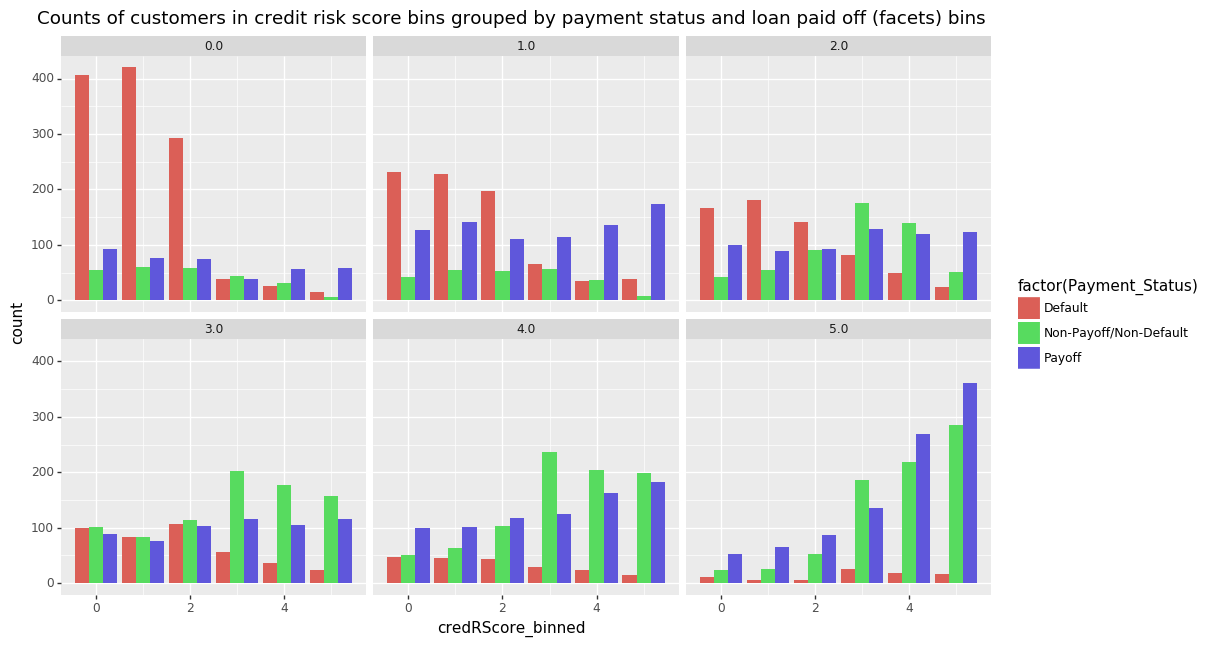

<ggplot: (-9223371943124960224)>

In [48]:
p = ggplot(finalDF, aes('credRScore_binned', fill = 'factor(Payment_Status)')) + \
      geom_bar(position = 'dodge')+facet_wrap('loan_paid_off_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in credit risk score bins grouped by payment status and loan paid off (facets) bins')
p

**Observation:**

1. Customers in lowest loan paid off bracket mostly have 'Default' payment status and low credit risk score
2. Significantly less customers have 'Default' payment status in the highest loan paid off bracket 
3. Credit risk score is mostly good/high when the payment status is 'PayOff' and the the loan paid off amount is high

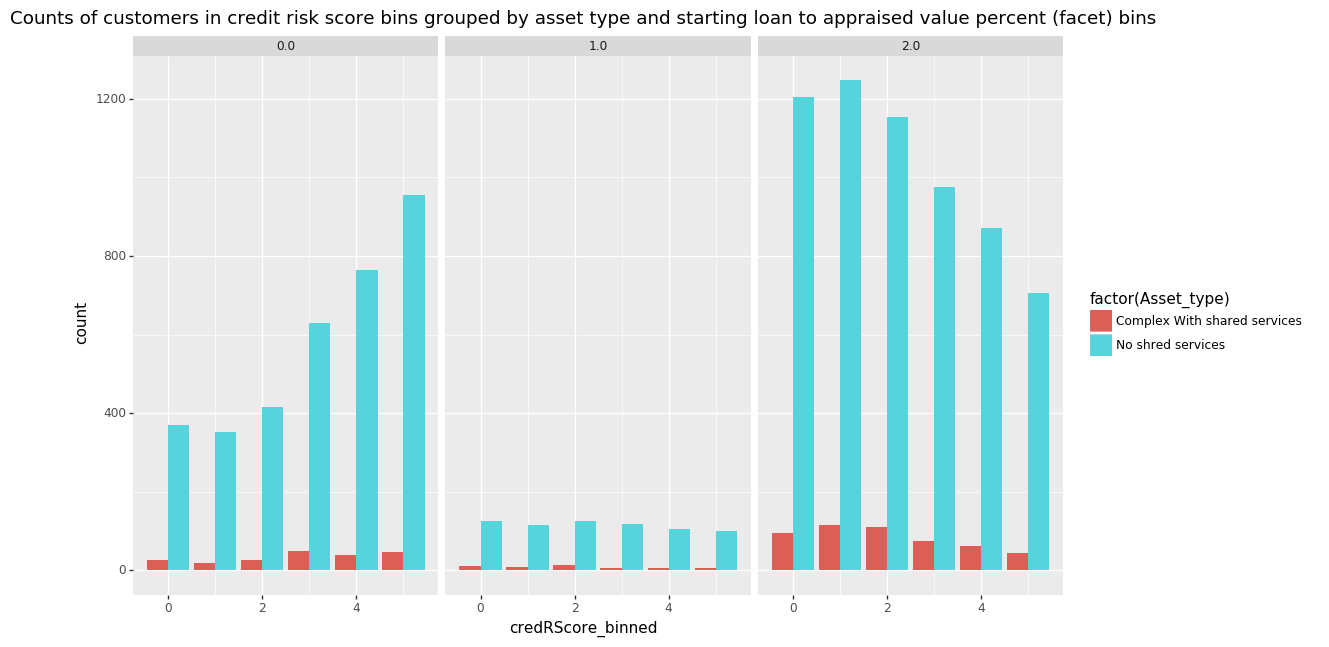

<ggplot: (93727424965)>

In [49]:
p = ggplot(finalDF, aes('credRScore_binned', fill = 'factor(Asset_type)')) + \
      geom_bar(position = 'dodge')+facet_wrap('Starting_Loan_to_Appraisedvalu_Percent_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in credit risk score bins grouped by asset type and starting loan to appraised value percent (facet) bins')
p

**Observation:**

1. In general, most of the customers have no shared service asset
2. More customers have higher credit risk score when starting loan issued is lower than appraised value
3. More customers have lower credit risk score when starting loan issued is higher than appraised value


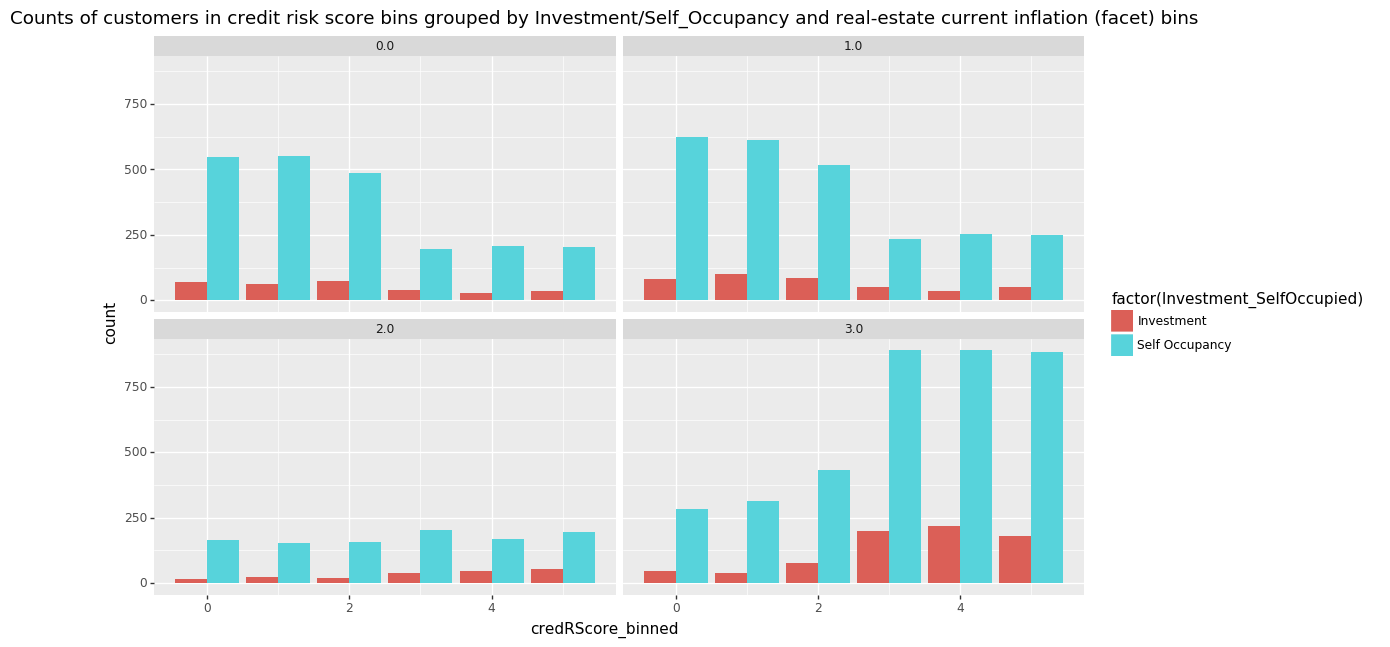

<ggplot: (-9223371943127019548)>

In [50]:
p = ggplot(finalDF, aes('credRScore_binned', fill = 'factor(Investment_SelfOccupied)')) + \
      geom_bar(position = 'dodge')+facet_wrap('RealEstate_Current_Inflation_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in credit risk score bins grouped by Investment/Self_Occupancy and real-estate current inflation (facet) bins')
p

**Observation:**

1. In general, most of the customers have no shared service asset
2. More customers have higher credit risk score when starting loan issued is lower than appraised value
3. More customers have lower credit risk score when starting loan issued is higher than appraised value


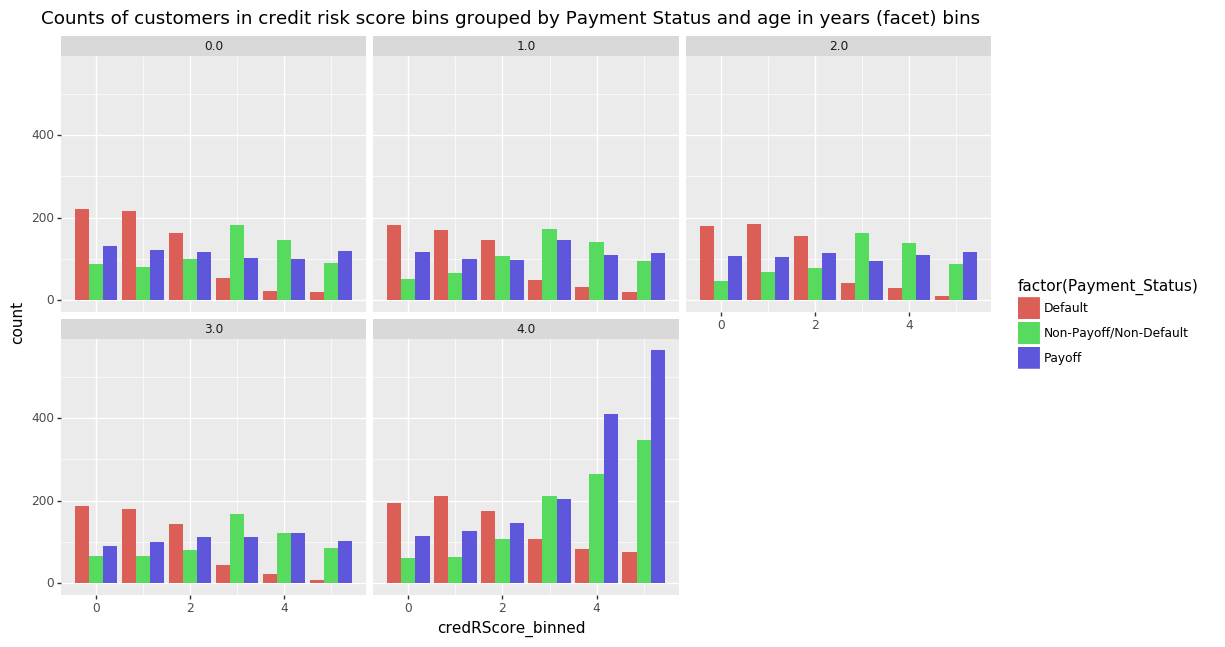

<ggplot: (-9223371943130186927)>

In [51]:
p = ggplot(finalDF, aes('credRScore_binned', fill = 'factor(Payment_Status)')) + \
      geom_bar(position = 'dodge')+facet_wrap('ageYears_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in credit risk score bins grouped by Payment Status and age in years (facet) bins')
p

**Observation:**

1. Older customers who have paid off their loan (Payment_Status = 'PayOff') mostly have higher credit scores
2. Proportionally more younger customers are likely to default


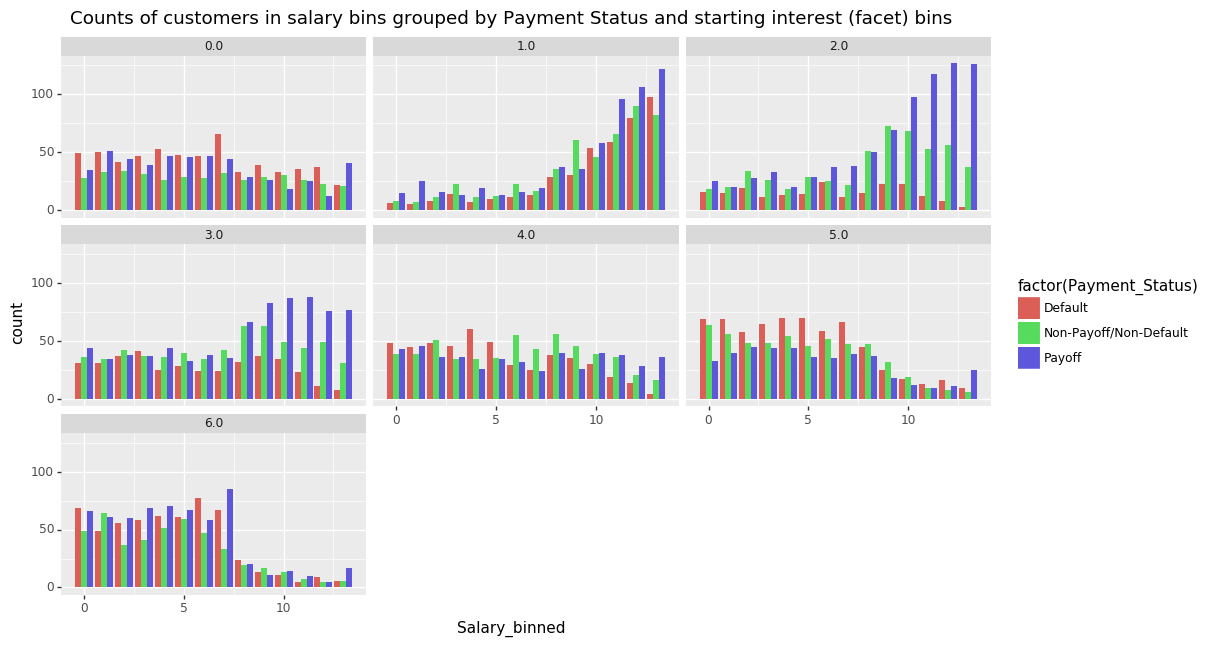

<ggplot: (93724334407)>

In [52]:
p = ggplot(finalDF, aes('Salary_binned', fill = 'factor(Payment_Status)')) + \
      geom_bar(position = 'dodge')+facet_wrap('StartingInterestrate_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in salary bins grouped by Payment Status and starting interest (facet) bins')
p

**Observation:**

1. At the lowest interest rate defaults are somewhat higher and uniform accross salary brackets
2. In the higher interest rate lower salaries have higher default rates 
3. In the the second bin of starting interest rate, defaults as well as payoffs are increasing with salary
4. In the the third and fourth bins of starting interest rate, defaults decrease and payoffs increase as salary increases.

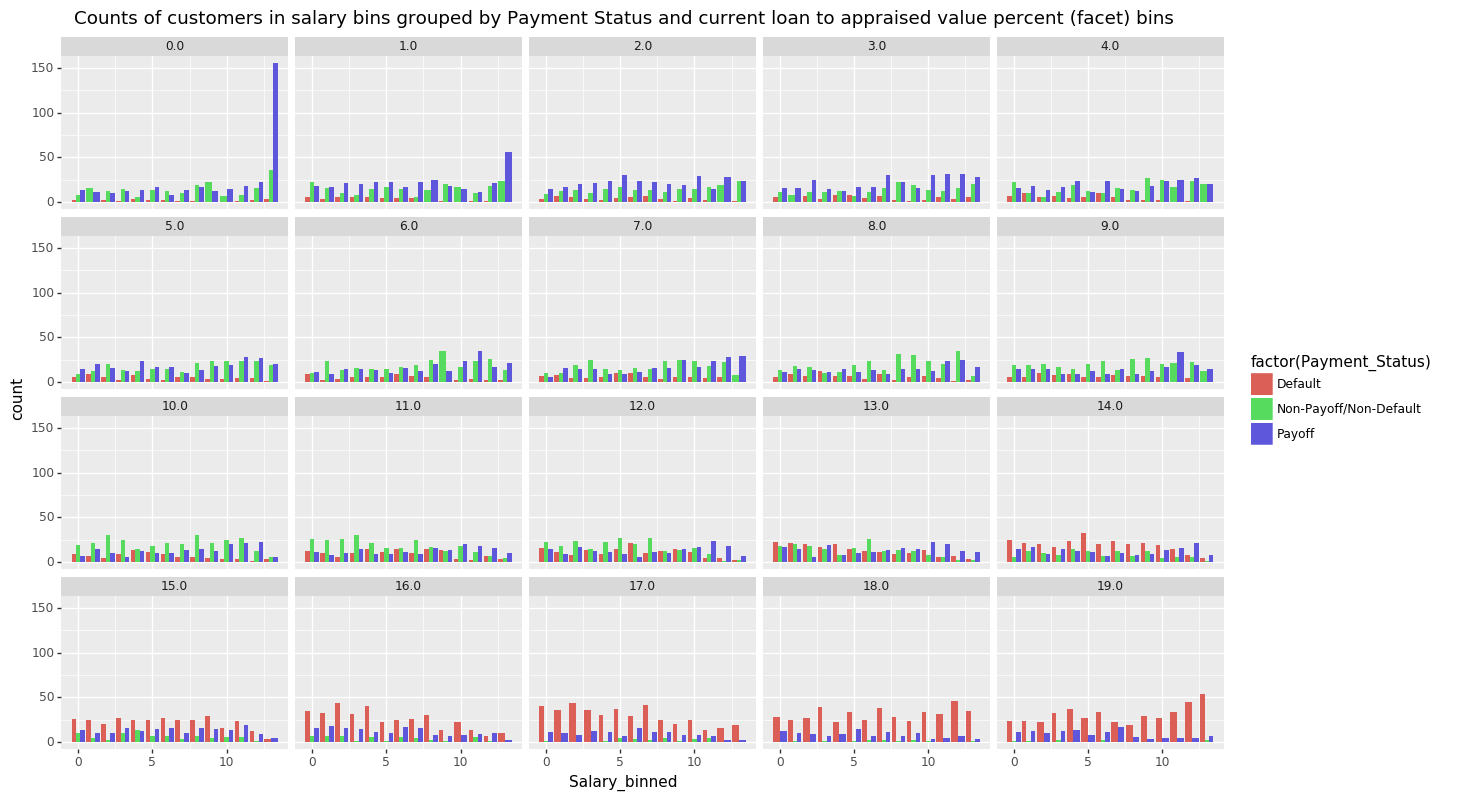

<ggplot: (-9223371943131005759)>

In [53]:
p = ggplot(finalDF, aes('Salary_binned', fill = 'factor(Payment_Status)')) + \
      geom_bar(position = 'dodge')+facet_wrap('Current_Loan_to_Appraisedvalu_Percent_binned') + theme(figure_size = (15,9)) +\
        labs(title='Counts of customers in salary bins grouped by Payment Status and current loan to appraised value percent (facet) bins')
p

**Observation:**

1. As current loan to appraised value ratio increases, defaults increase accross all salary brackets

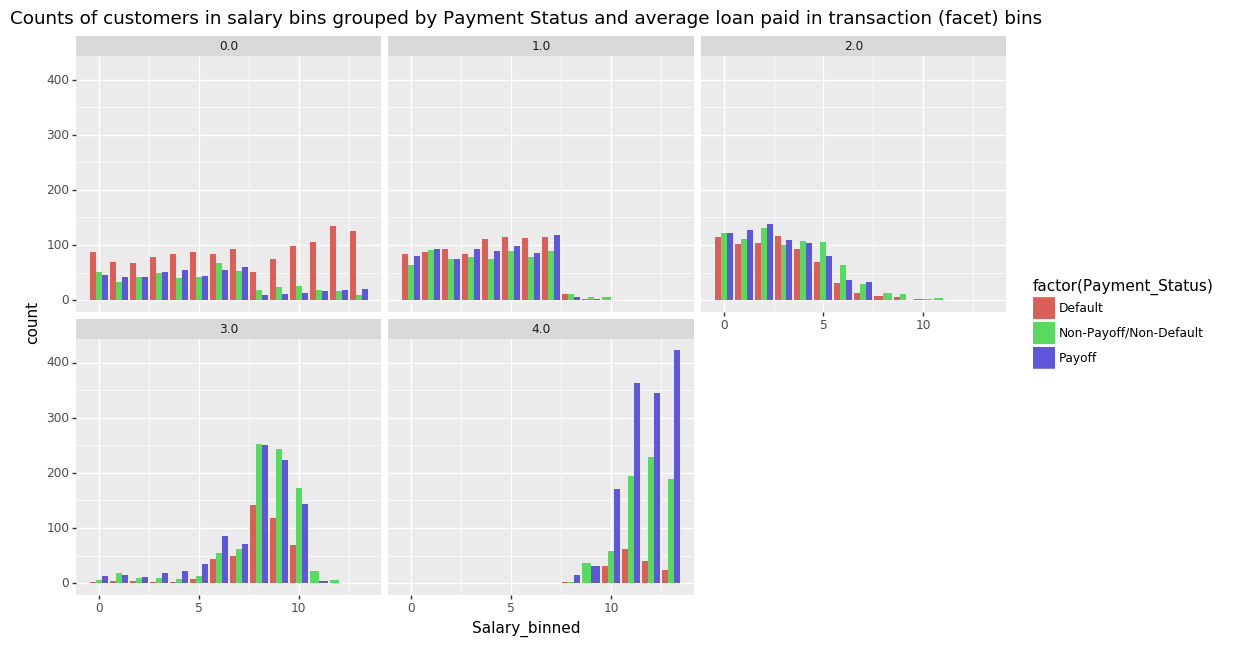

<ggplot: (-9223371943128267425)>

In [54]:
p = ggplot(finalDF, aes('Salary_binned', fill = 'factor(Payment_Status)')) + \
      geom_bar(position = 'dodge')+facet_wrap('Avg_loan_paid_in_transaction_binned') + theme(figure_size = (12,7)) +\
        labs(title='Counts of customers in salary bins grouped by Payment Status and average loan paid in transaction (facet) bins')
p

**Observation:**

1. Most of the customers earning high salaries are paying highest average loan per transaction, if they are not they are defaulting
2. For lower salaried customers, no matter the average loan paid per transaction, defaults are observed 

In [55]:
# from datetime import datetime as DateTime
# csvName = "FullData_" + (str(DateTime.now().time())[0:8]).replace(':','-') + '.csv'
csvName = "finalDF.csv"
finalDF.to_csv(csvName,index=False)

### ====================== Read the data that has been preprocessed in R ===========================

In [56]:
finalDF_preprocessed = pd.read_csv("fullDataDF_preprocessed.csv")

In [57]:
finalDF_preprocessed.head()

,Salary,UtilitySpending,CreditRiskScore,age_in_years,Total_no_of_loan_tenure_with_current,Avg_loan_paid_in_transaction,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Current_Loan_to_Appraisedvalu_Percent,...,Urban_Development_No,Urban_Development_Yes,Villa_House_No,Villa_House_Yes,Investment_SelfOccupied_Investment,Investment_SelfOccupied_Self_Occupancy,Payment_Status_Default,Payment_Status_Non.Payoff.Non.Default,Payment_Status_Payoff,CustomerID
0,-0.300619,1.663723,0.563926,2.698625,-0.030479,-0.153331,-0.874296,1.182201,-3.093198,-1.802893,...,1,0,0,1,0,1,1,0,0,C12116
1,-0.262783,1.499546,0.942068,-0.255109,-1.365368,-0.223237,-0.816088,0.607060,-0.270452,-0.210743,...,1,0,0,1,0,1,1,0,0,C12117
2,-0.276577,0.104037,1.347220,2.452480,1.018362,-0.238205,-2.513813,2.467810,-3.354616,-2.135124,...,1,0,0,1,0,1,0,1,0,C12118
3,-0.300332,0.678658,1.131139,0.975613,1.018362,-0.251341,-2.086956,2.247903,-3.337942,-2.081726,...,1,0,1,0,0,1,0,1,0,C12119
4,-0.316329,0.706021,1.347220,1.221758,1.018362,-0.191018,-1.369061,1.199117,-3.345007,-2.080034,...,1,0,0,1,0,1,0,1,0,C12120


In [58]:
CustID = finalDF_preprocessed.CustomerID 
finalDF_preprocessed.drop('CustomerID', axis=1, inplace=True)

In [59]:
#Using the elbow method to find the optimum number of clusters based on the below selected columns
subset_cols = ["Salary", "StartingInterestrate"]

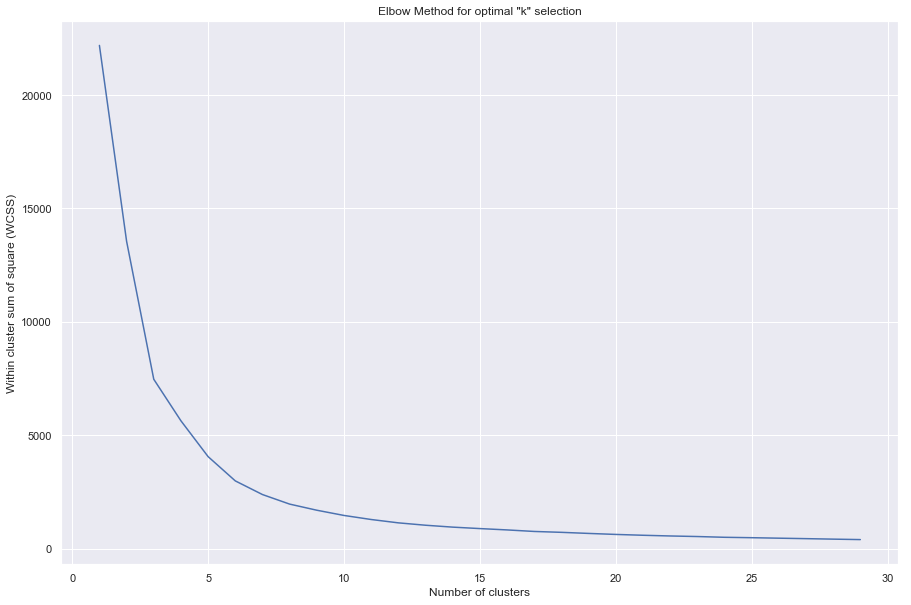

In [60]:
dat = finalDF_preprocessed[subset_cols]
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(dat)
    wcss.append(km.inertia_)
plt.plot(range(1,30),wcss)
plt.title('Elbow Method for optimal "k" selection')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of square (WCSS)')
plt.show()

### Fitting the k-means to the dataset with k=6, based on inferences from the elbow method using the above chart

In [61]:
##Fitting kmeans to the dataset with k=6
nclust=6
kmeamsModel=KMeans(n_clusters=nclust,init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeansoutput=kmeamsModel.fit(dat)
y_means = kmeamsModel.fit_predict(dat)

In [62]:
clusteredcustomers = pd.DataFrame({"CustomerID": CustID, "Cluster": y_means})

clusteredcustomers.head()

finalDF_with_clusters = finalDF.merge(clusteredcustomers, how="left", left_on="CustomerID", right_on="CustomerID",\
                                     left_index=False, right_index=False)

finalDF_with_clusters.head()

,CustomerID,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Salary_binned_kmeans,Salary_binned,...,Remaining_loan_tenure_binned,loan_paid_off_binned_kmeans,loan_paid_off_binned,CurrentInterestrate_binned_kmeans,CurrentInterestrate_binned,GDP_binned_kmeans,GDP_binned,UnemploymentRate_binned_kmeans,UnemploymentRate_binned,Cluster
0,C12116,1238.006112,0,492.726433,1,No,2,711,0.0,2.0,...,1.0,1.0,3.0,10.0,18.0,7.0,6.0,10.0,13.0,0
1,C12117,1633.000000,1,477.870359,1,Yes,1,767,0.0,5.0,...,15.0,1.0,1.0,11.0,18.0,11.0,16.0,0.0,1.0,0
2,C12118,1489.000000,0,351.593736,1,Yes,1,827,0.0,4.0,...,1.0,1.0,2.0,15.0,19.0,9.0,11.0,10.0,12.0,0
3,C12119,1241.000000,0,403.589993,1,No,1,795,0.0,2.0,...,1.0,1.0,2.0,15.0,19.0,9.0,11.0,10.0,12.0,0
4,C12120,1074.000000,1,406.066005,1,No,1,827,0.0,0.0,...,1.0,1.0,3.0,9.0,16.0,9.0,11.0,10.0,12.0,0


In [63]:
subset1 = finalDF_with_clusters[subset_cols]


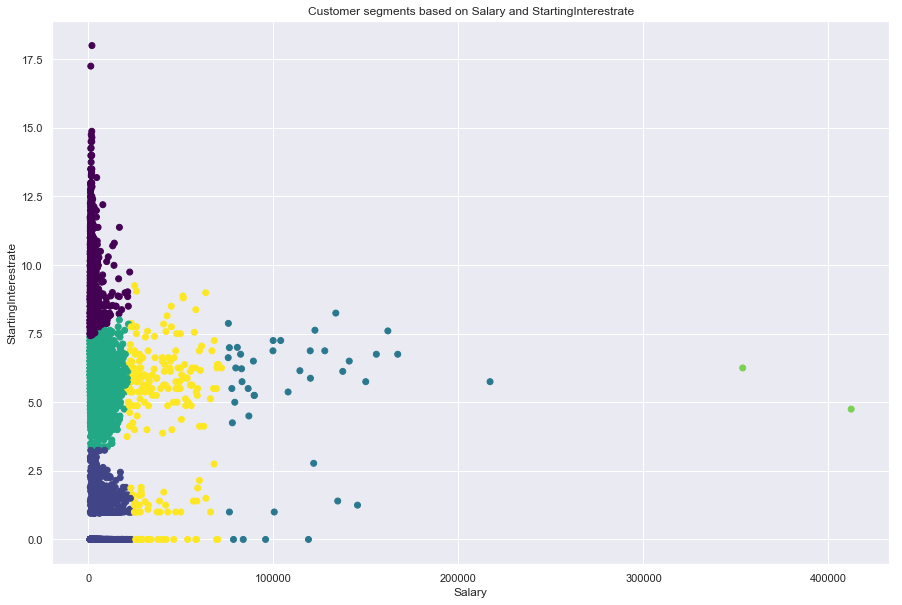

In [64]:
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols[0])
plt.ylabel(subset_cols[1])
# plt.legend()
plt.show()

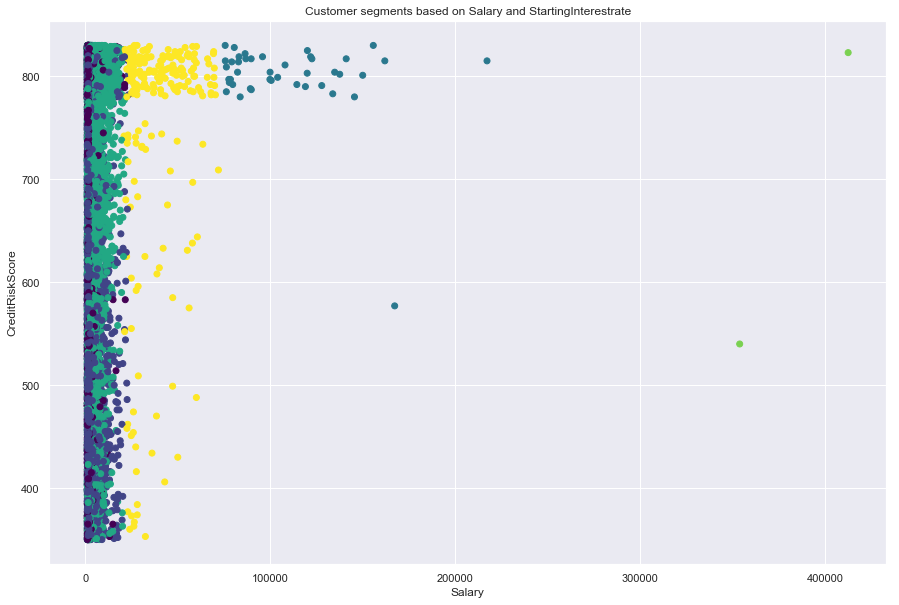

In [65]:
subset_cols2 = ["Salary","CreditRiskScore"]
subset1 = finalDF_with_clusters[subset_cols2]
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols2[0])
plt.ylabel(subset_cols2[1])
# plt.legend()
plt.show()

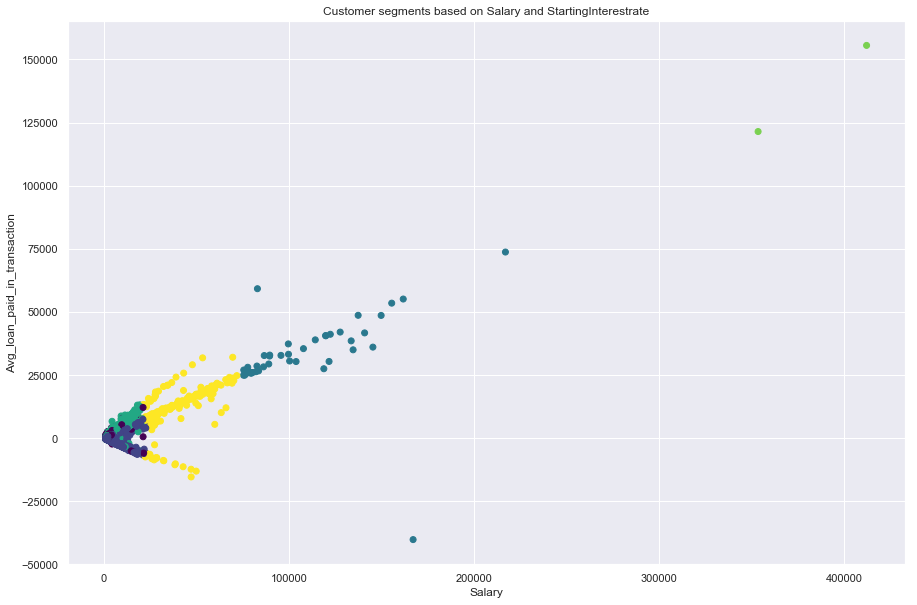

In [66]:
subset_cols3 = ["Salary","Avg_loan_paid_in_transaction"]
subset1 = finalDF_with_clusters[subset_cols3]
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols3[0])
plt.ylabel(subset_cols3[1])
# plt.legend()
plt.show()

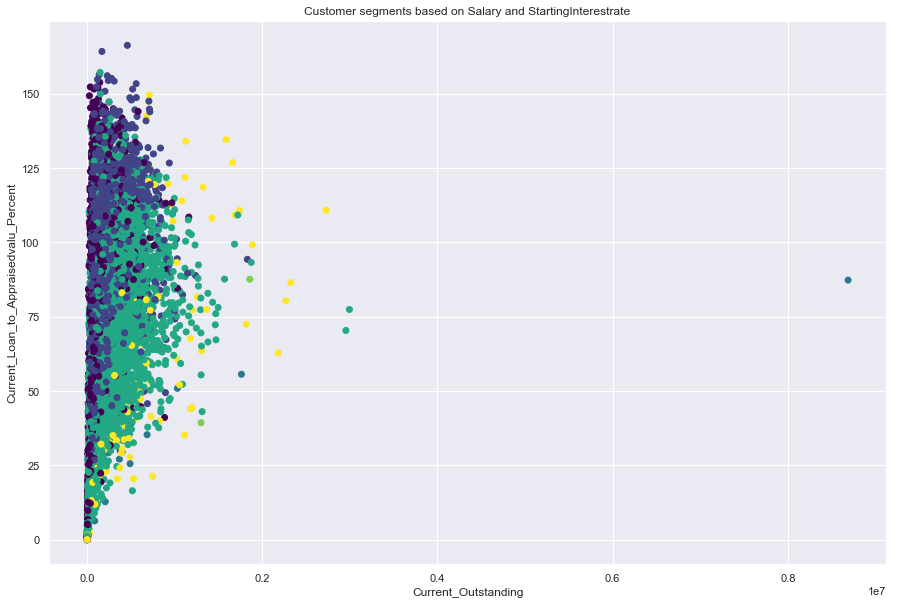

In [67]:
subset_cols4 = ["Current_Outstanding","Current_Loan_to_Appraisedvalu_Percent"]
subset1 = finalDF_with_clusters[subset_cols4]
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols4[0])
plt.ylabel(subset_cols4[1])
# plt.legend()
plt.show()

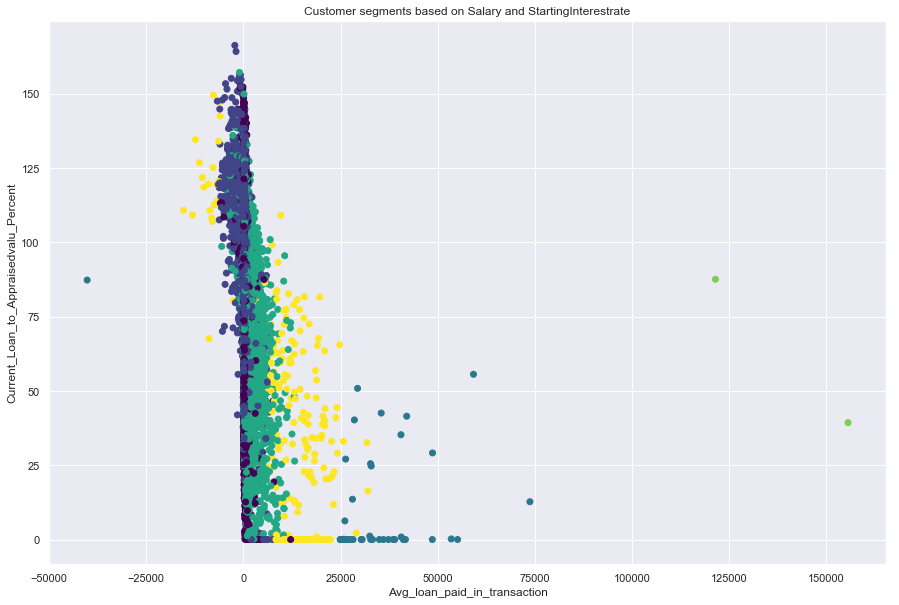

In [68]:
subset_cols5 = ["Avg_loan_paid_in_transaction","Current_Loan_to_Appraisedvalu_Percent"]
subset1 = finalDF_with_clusters[subset_cols5]
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols5[0])
plt.ylabel(subset_cols5[1])
# plt.legend()
plt.show()

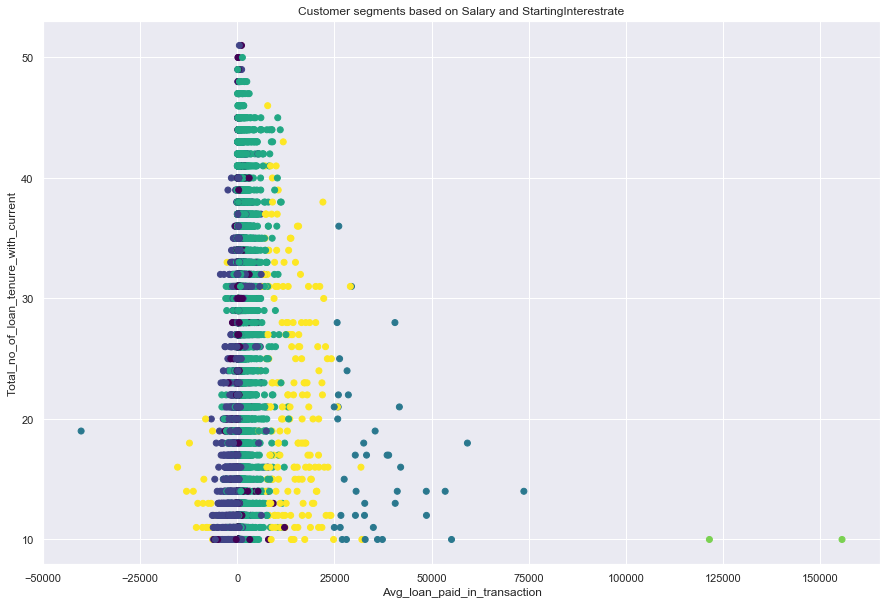

In [69]:
subset_cols6 = ["Avg_loan_paid_in_transaction","Total_no_of_loan_tenure_with_current"]
subset1 = finalDF_with_clusters[subset_cols6]
plt.scatter(subset1.iloc[:,0],subset1.iloc[:,1],c=kmeansoutput.labels_,cmap='viridis')
# plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments '+'based on '+subset_cols[0] +" and "+subset_cols[1])
plt.xlabel(subset_cols6[0])
plt.ylabel(subset_cols6[1])
# plt.legend()
plt.show()

### Comment

#### Using two variables, "Salary", "StartingInterestrate" for clustering, the results are already quite good from the point of view of separating the clusters of customers. This is a very preliminary customer segmentation and will be refined in the next iteration